In [73]:
import sys
sys.path.append('../../')

In [74]:
from obelix_ml_pipeline.predictions_on_unseen_substrate import predict_out_of_sample_substrate
from obelix_ml_pipeline.representation_variables import AVAILABLE_LIGAND_REPRESENTATION_TYPES, AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Objective 1: Predictions on unseen substrate

For a complete new substrate, the model gives the performance of 192 ligands with an accuracy as high as possible
1A Methodology:
Classification on activity, regression on ee

*   Use more accurate representation of substrate!!
*   Train on SM1, SM2 (SM7, SM8), predict SM3
*   Train on SM2, SM3 (SM7, SM8), predict SM1
*   Train on SM1, SM3 (SM7, SM8), predict SM2

## Example application of pipeline

Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.83 +/- 0.05
Best model performance: 0.98
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.8333750469277938
Test set confusion matrix:  [[ 43  18]
 [  5 126]]


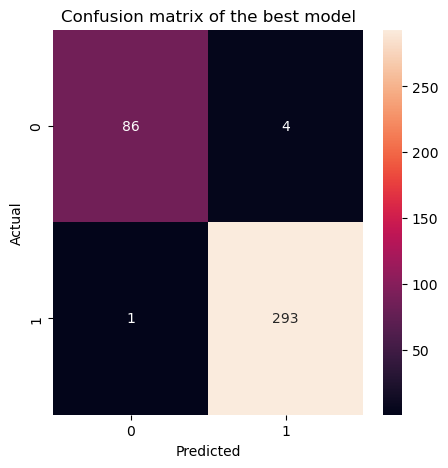

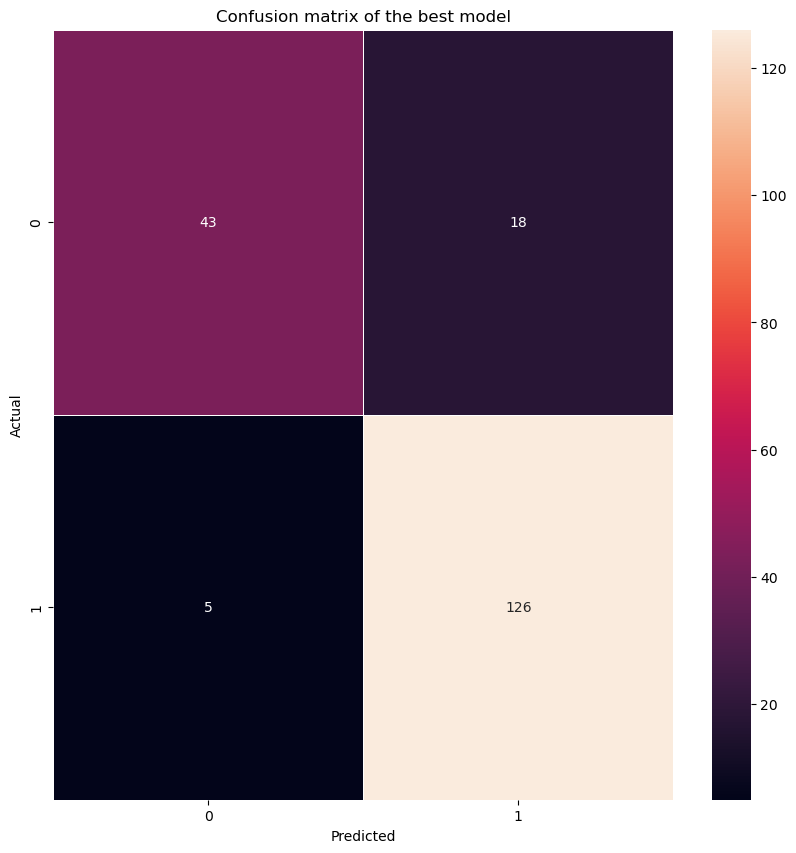

In [63]:
# try classifier with loaded representations
selected_ligand_representations = ['dft_nbd_model']
selected_substrate_representations = ['ecfp']
target = 'Conversion'
target_threshold = 0.8
rf_model = RandomForestClassifier(random_state=42)
scoring = 'balanced_accuracy'
train_splits = 5
n_jobs = 4
binary = True
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = True
print('Training and testing classifier')
print(f'Test size in training (based on K-fold): {1/train_splits}')
# do the same with general function predict_out_of_sample_substrate
#best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test
res = predict_out_of_sample_substrate(selected_ligand_representations, 
                                      selected_substrate_representations, 
                                      ligand_numbers_column, 
                                      substrate_names_column, 
                                      target, 
                                      target_threshold, 
                                      train_splits, 
                                      binary=binary, 
                                      list_of_training_substrates=list_of_training_substrates, 
                                      list_of_test_substrates=list_of_test_substrates, 
                                      rf_model=rf_model, 
                                      scoring=scoring, 
                                      print_ml_results=print_ml_results, 
                                      n_jobs=n_jobs, 
                                      plot_dendrograms=plot_dendrograms)


In [21]:
fig_fi

Training and testing regression
Test size: 0.2
Mean test performance: 0.45 +/- 0.06
Best model performance: 0.95
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test set performance r2:  0.5544707208667725


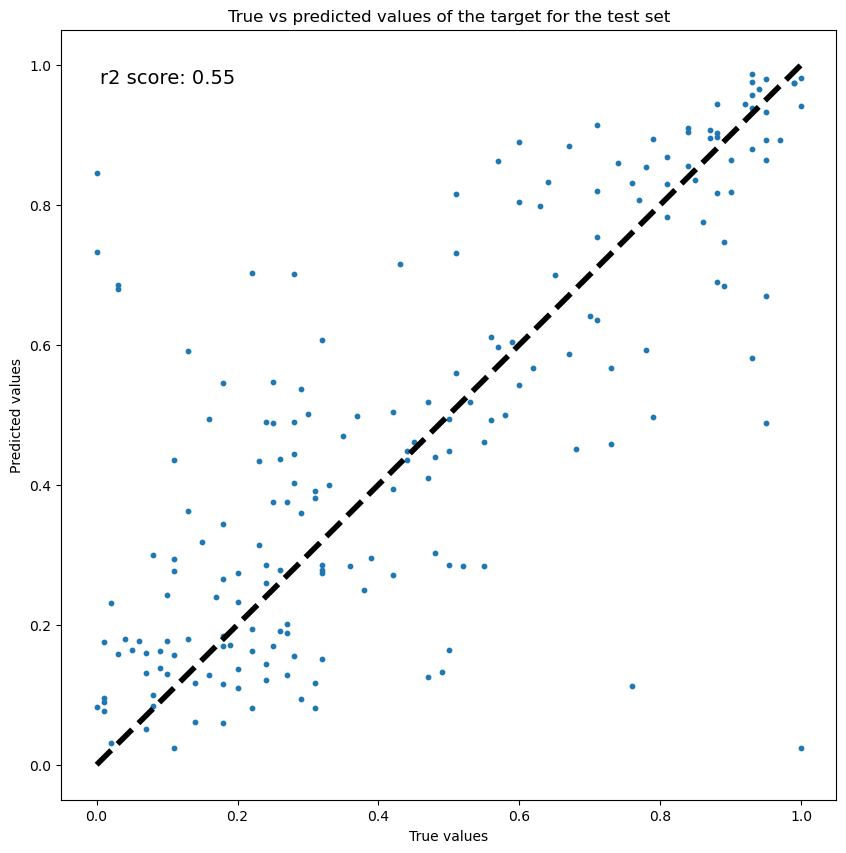

In [60]:
# try regression with loaded representations
target = 'EE'
target_threshold = 0.6
rf_model = RandomForestRegressor(random_state=42)
scoring = 'r2'
binary = False
print('Training and testing regression')
print(f'Test size: {1/train_splits}')
res = predict_out_of_sample_substrate(
    selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
    substrate_names_column, target, target_threshold, train_splits, binary=binary,
    list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
    rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)

In [24]:
fig_fi

## Test effect of different substrate/ligand representations

### Test effect of different substrate/ligand representations on classification

dft_nbd_model + dft_steric_fingerprint
Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.83 +/- 0.03
Best model performance: 1.00
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.842134901764485
Test set confusion matrix:  [[ 45  16]
 [  7 124]]
dft_nbd_model + smiles_steric_fingerprint
Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.84 +/- 0.01
Best model performance: 1.00
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.8459516956576149
Test set confusion matrix:  [[ 45  16]
 [  6 125]]
dft_nbd_model + dl_chylon
Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test perfo

/projects/home/cvalsecc/repo/obelix-ml-pipeline/obelix_ml_pipeline/notebooks/../../obelix_ml_pipeline/machine_learning.py:58: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



Mean test performance: 0.80 +/- 0.11
Best model performance: 0.90
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.7593149038461539
Test set confusion matrix:  [[ 29  23]
 [  5 123]]
dl_chylon + rdkit
Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.81 +/- 0.11
Best model performance: 0.90
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.7536057692307692
Test set confusion matrix:  [[ 28  24]
 [  4 124]]
dl_chylon + sterimol
Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.80 +/- 0.11
Best model performance: 0.89
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'min_sample

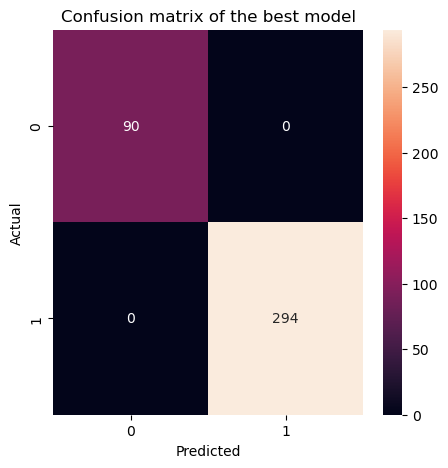

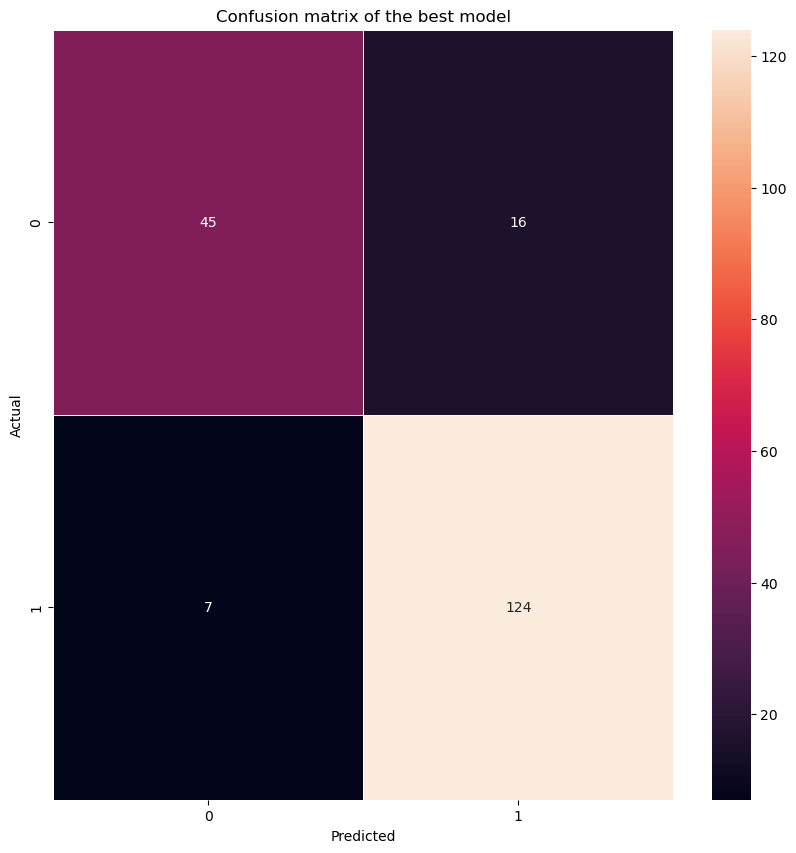

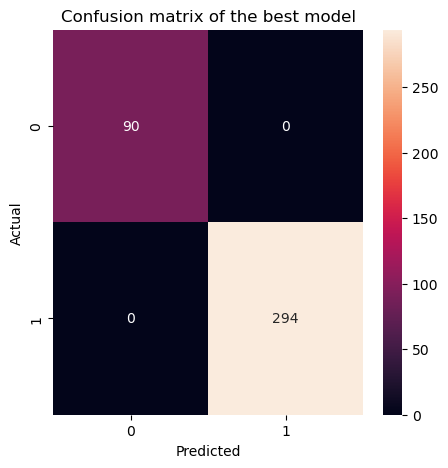

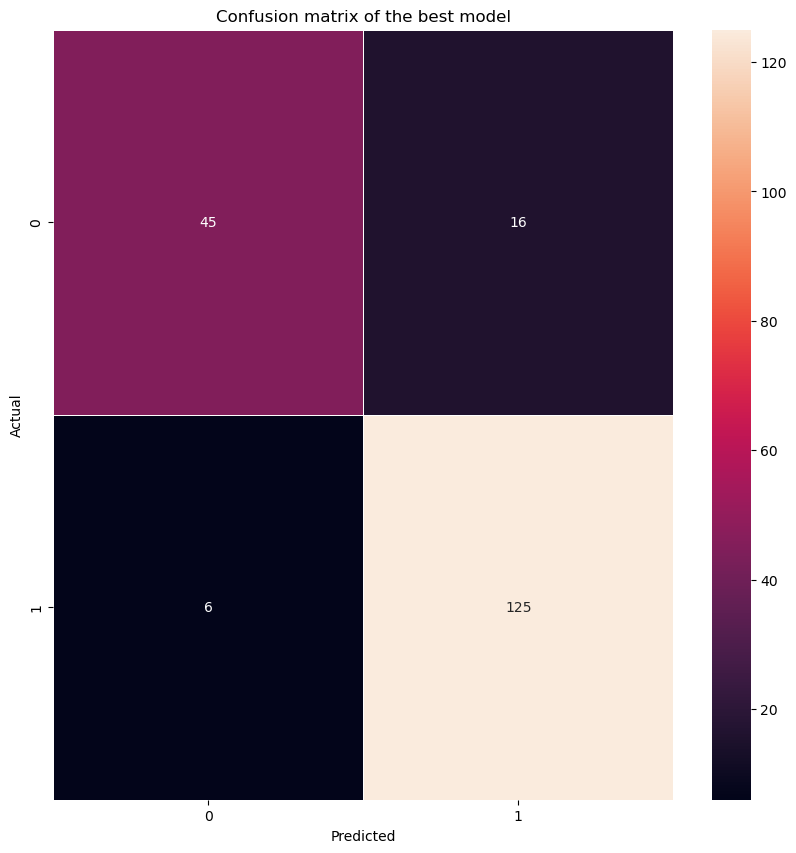

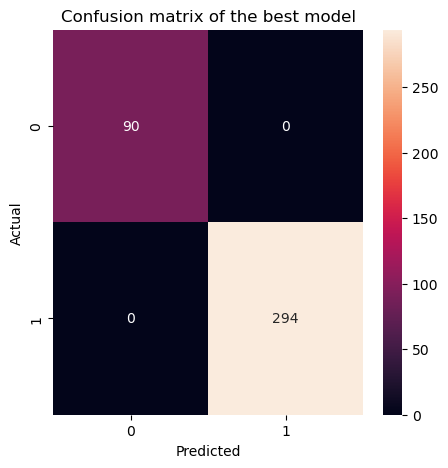

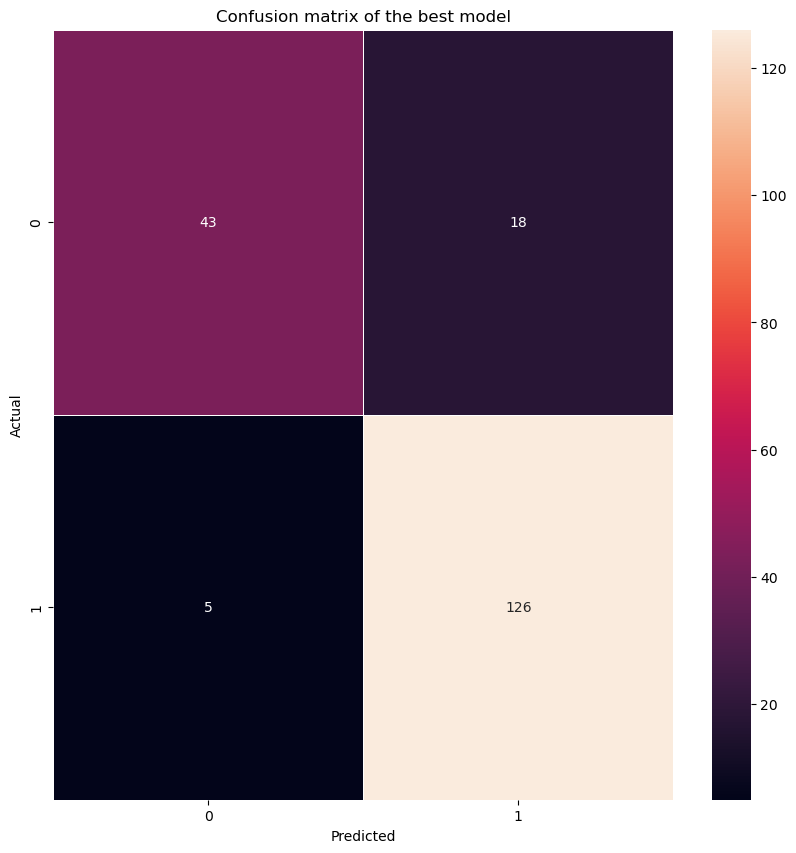

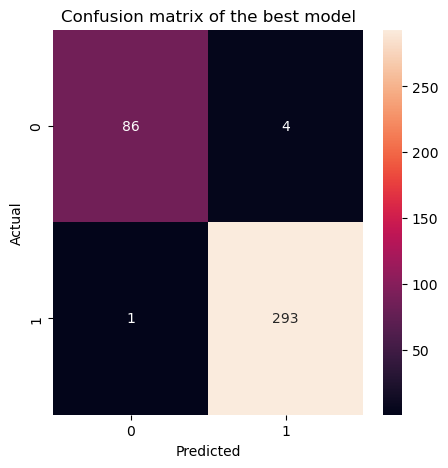

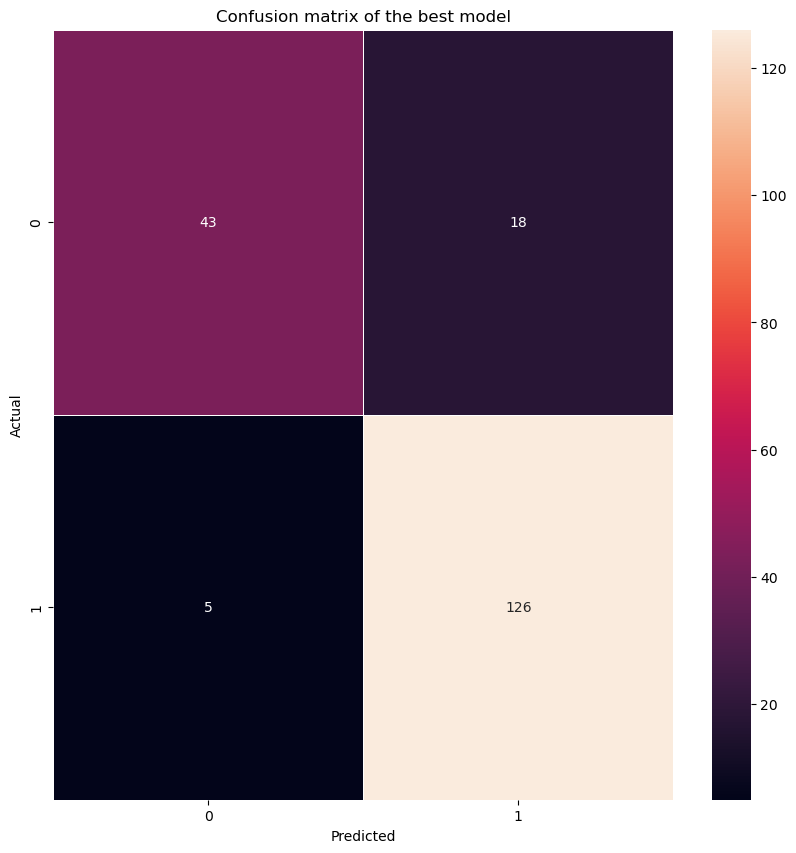

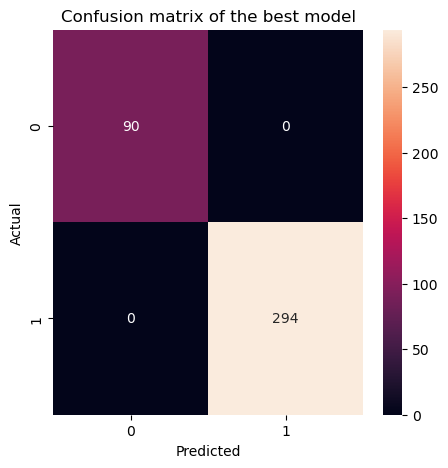

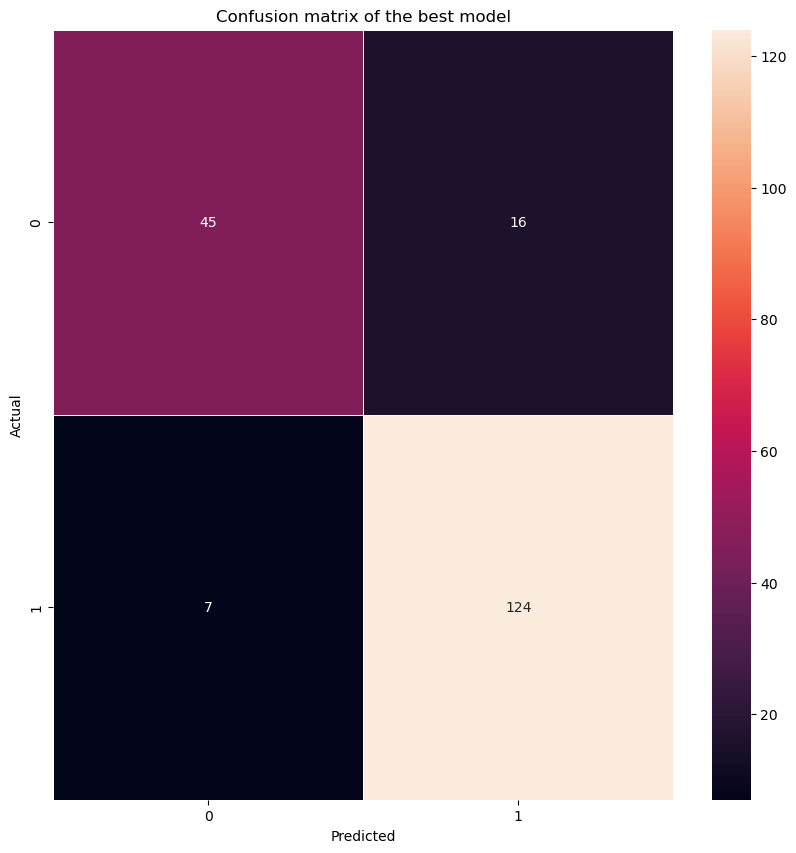

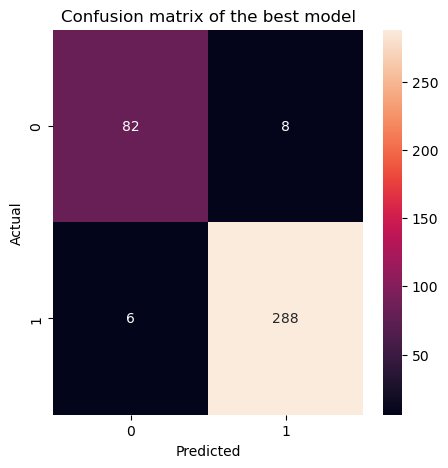

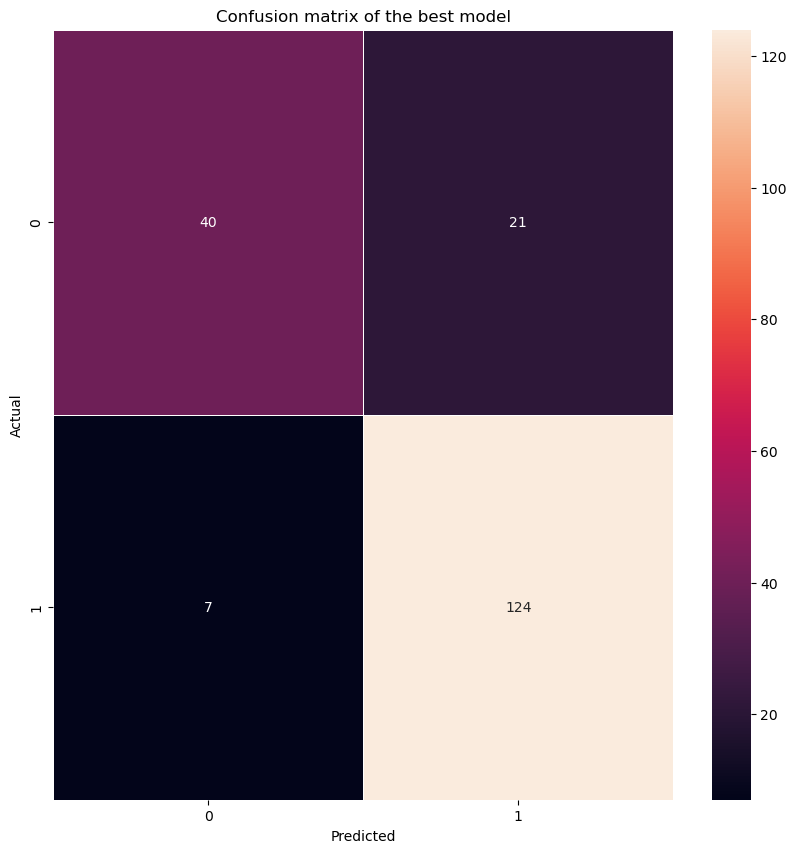

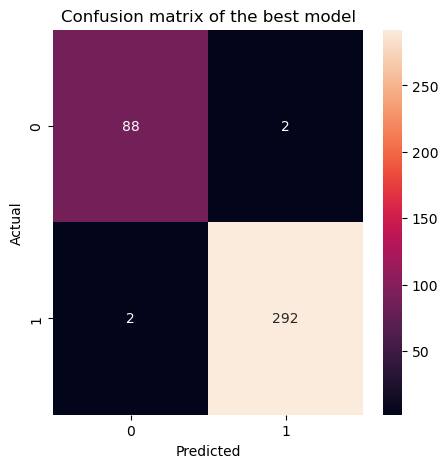

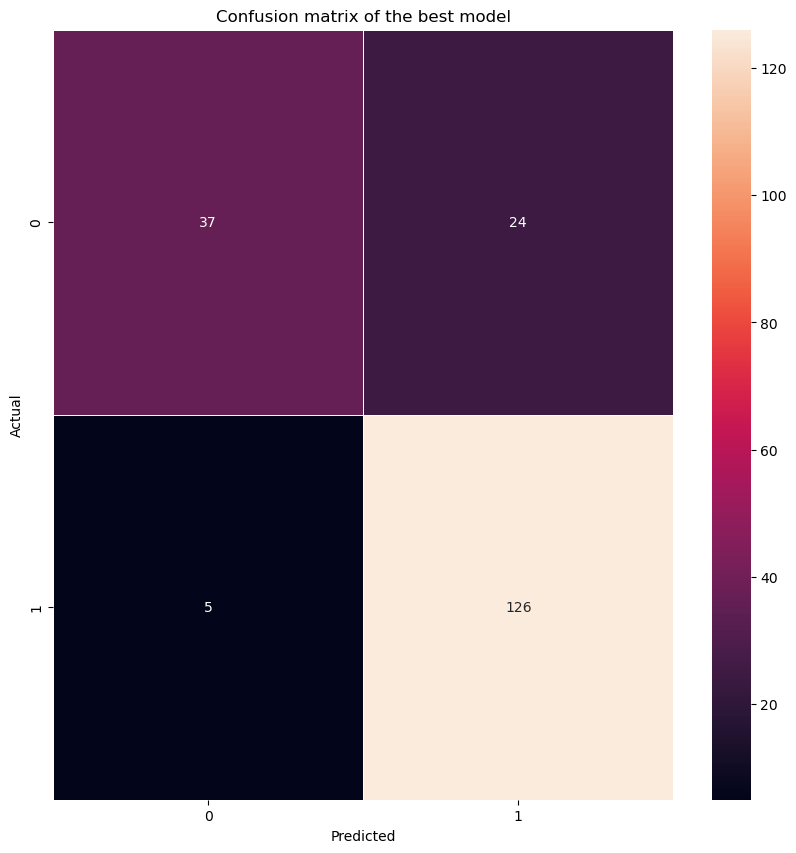

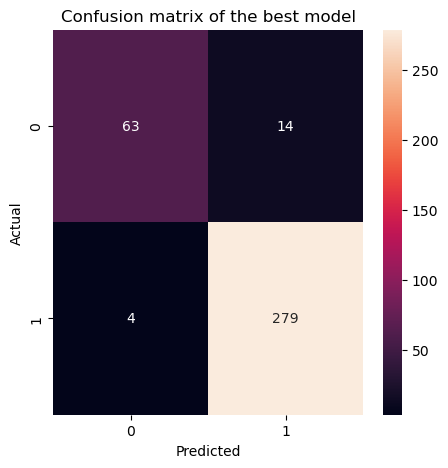

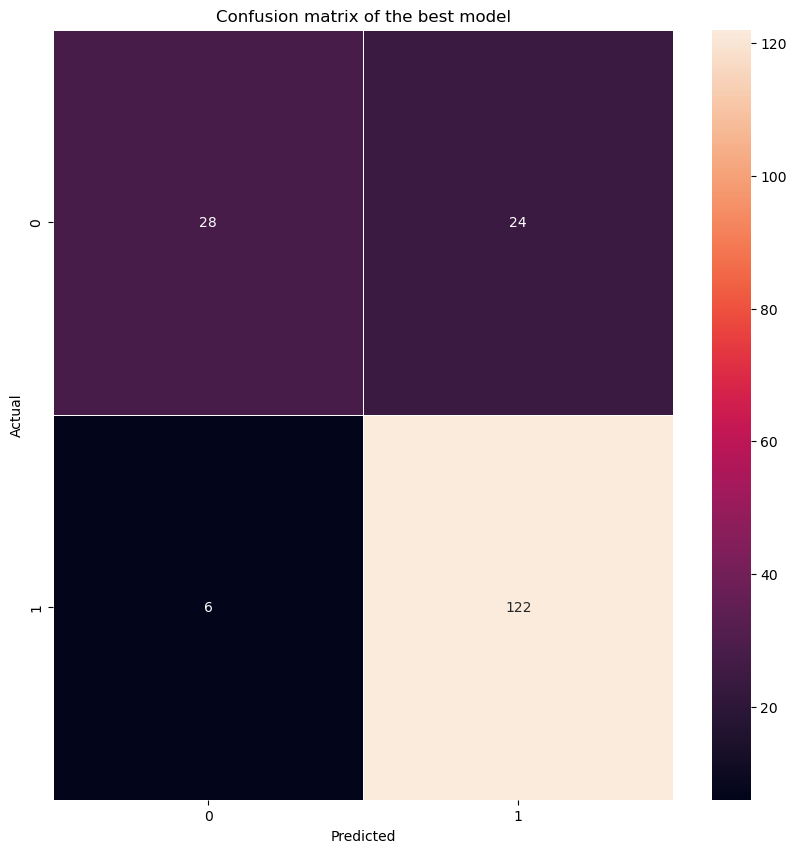

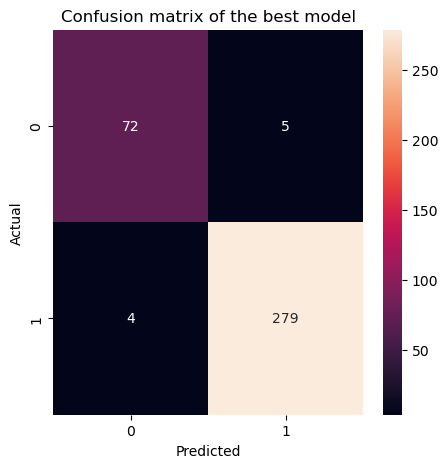

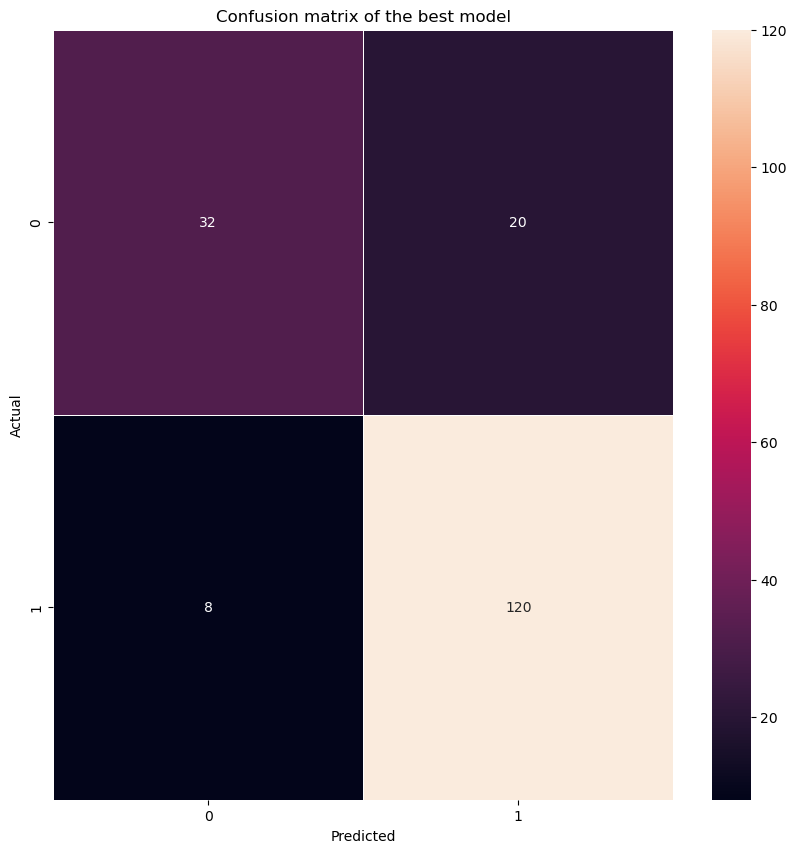

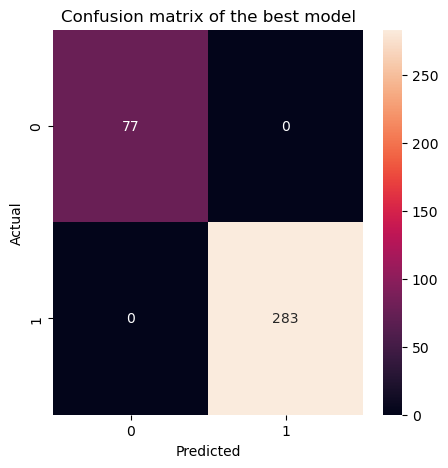

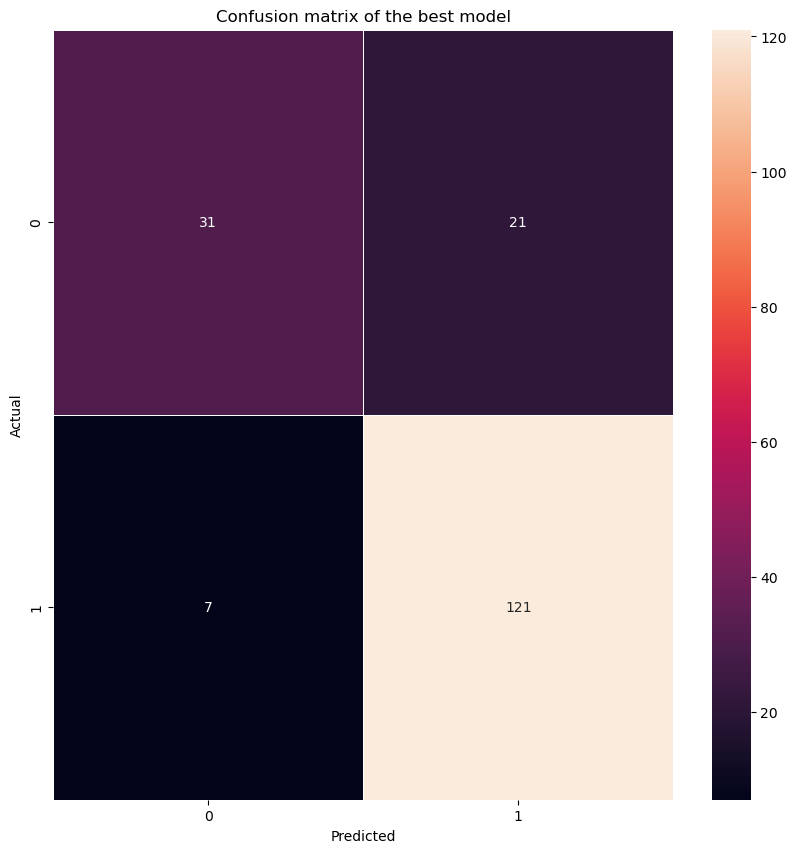

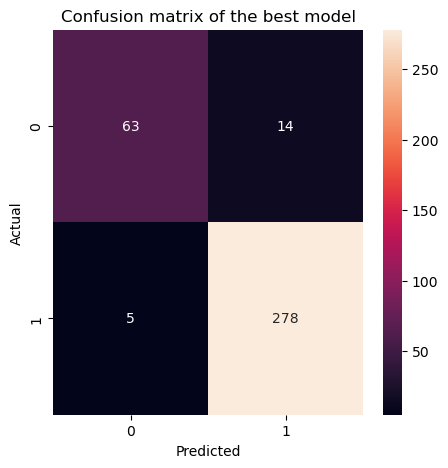

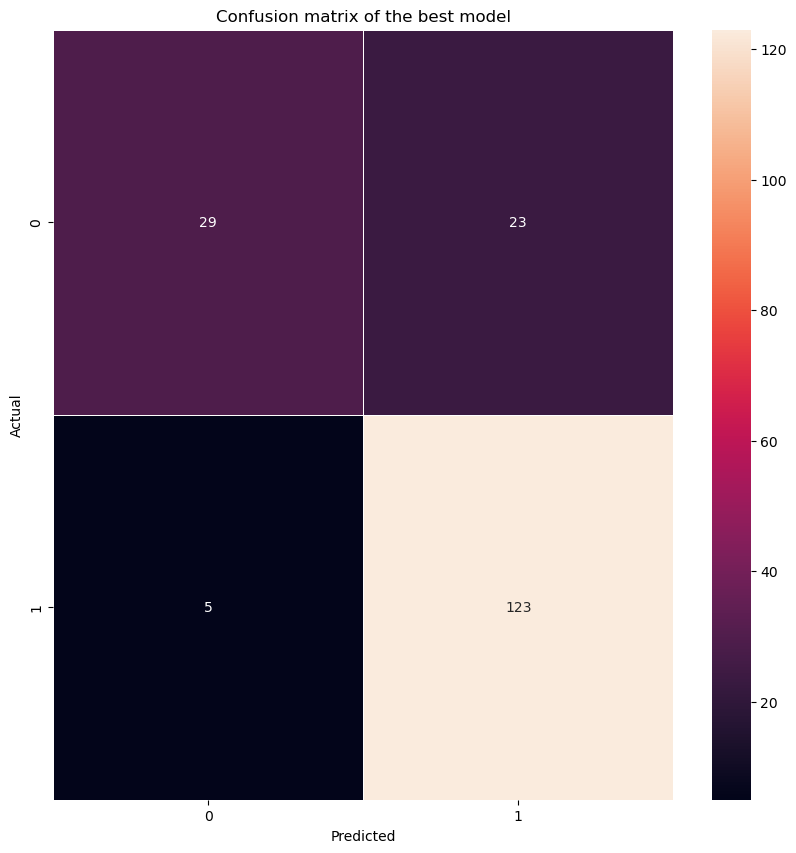

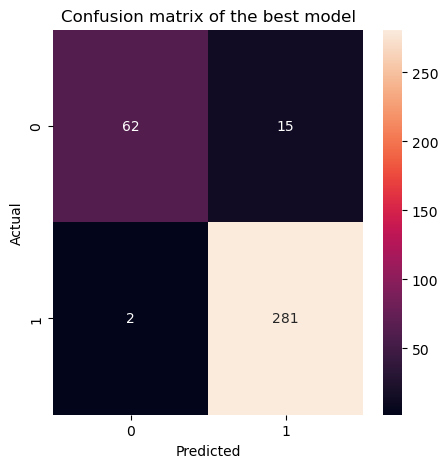

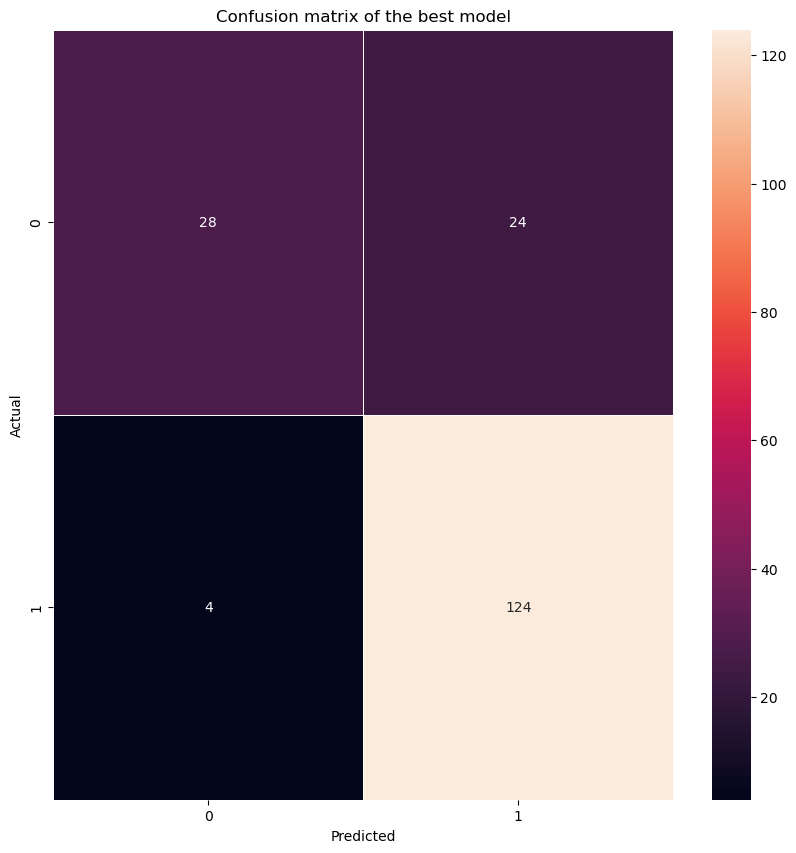

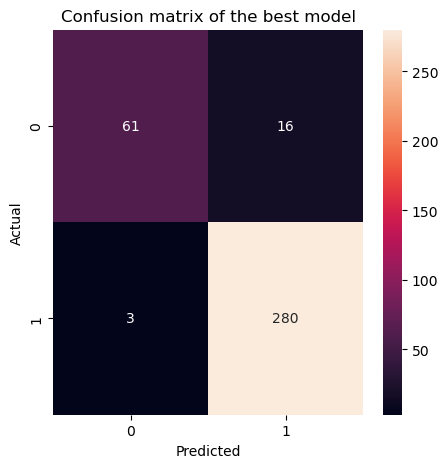

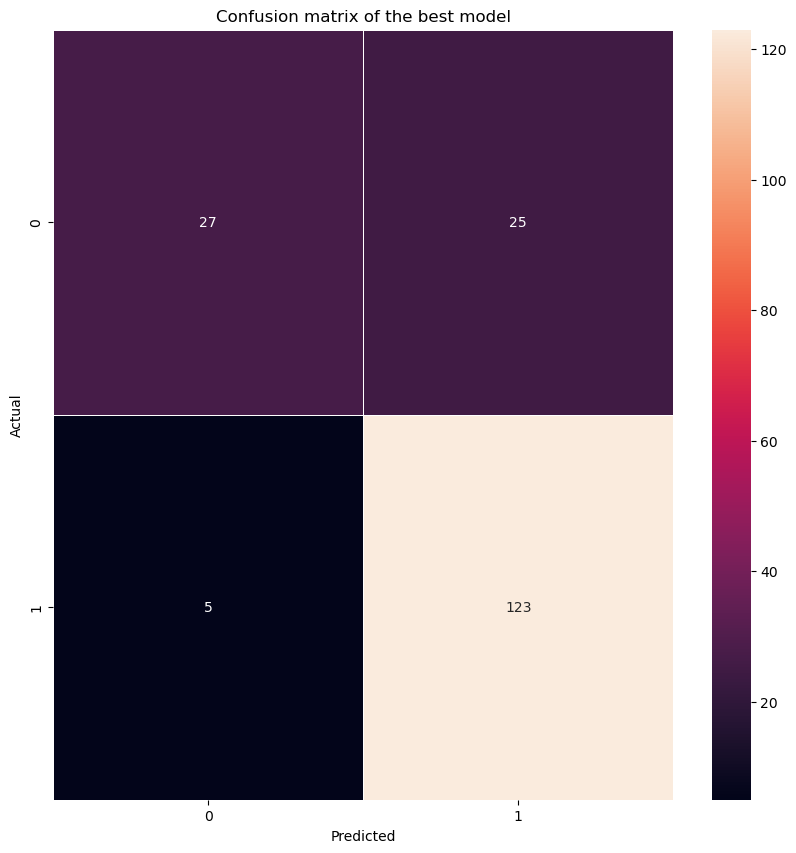

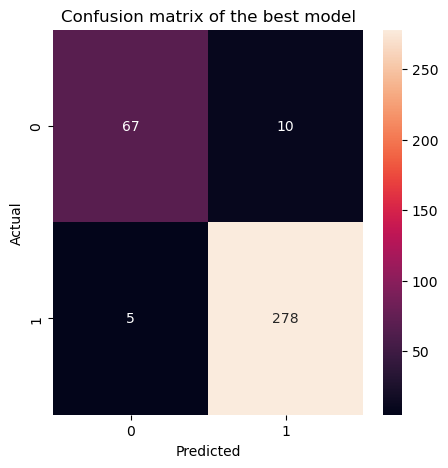

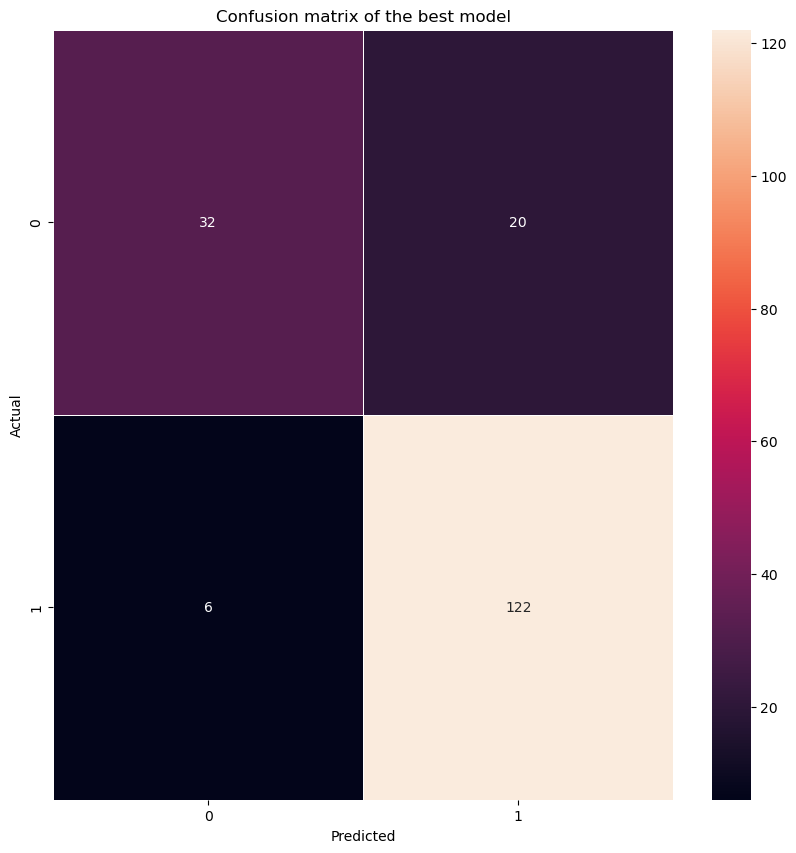

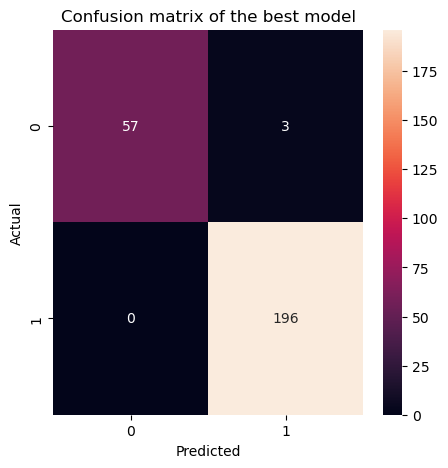

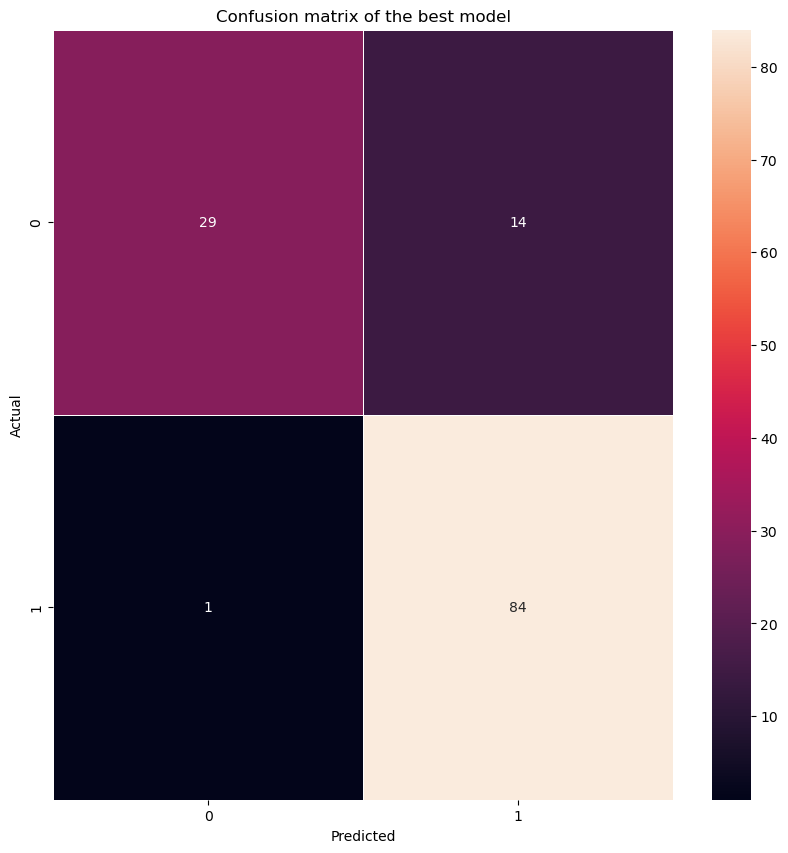

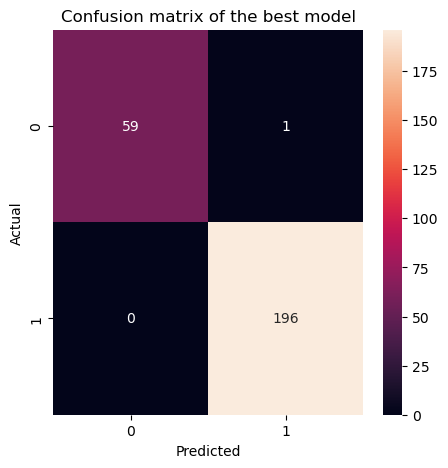

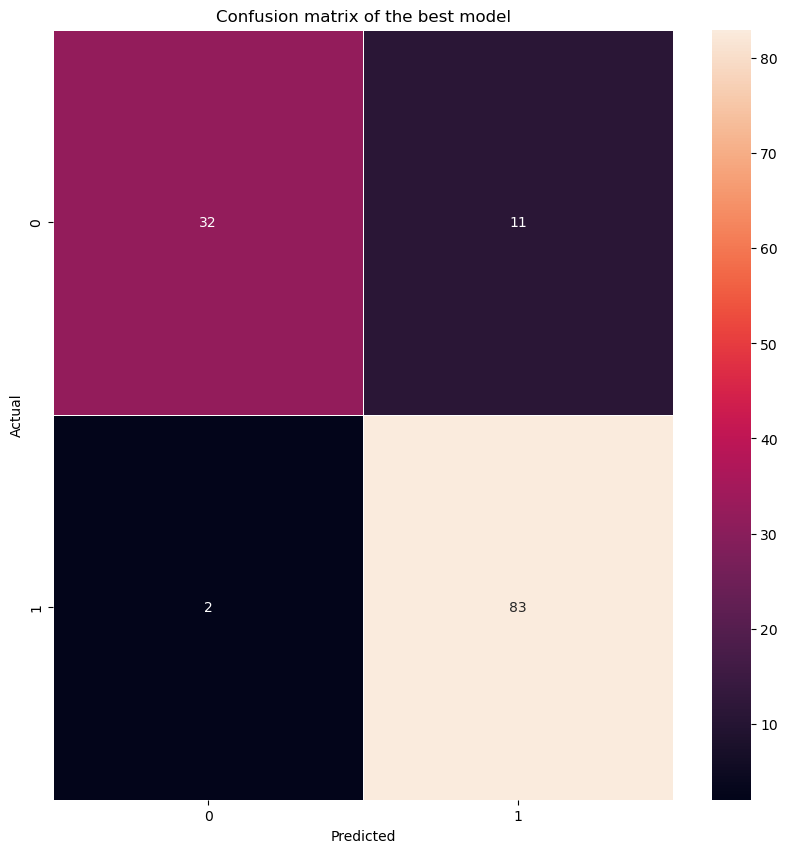

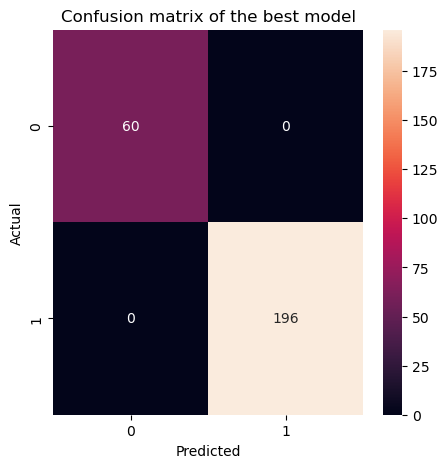

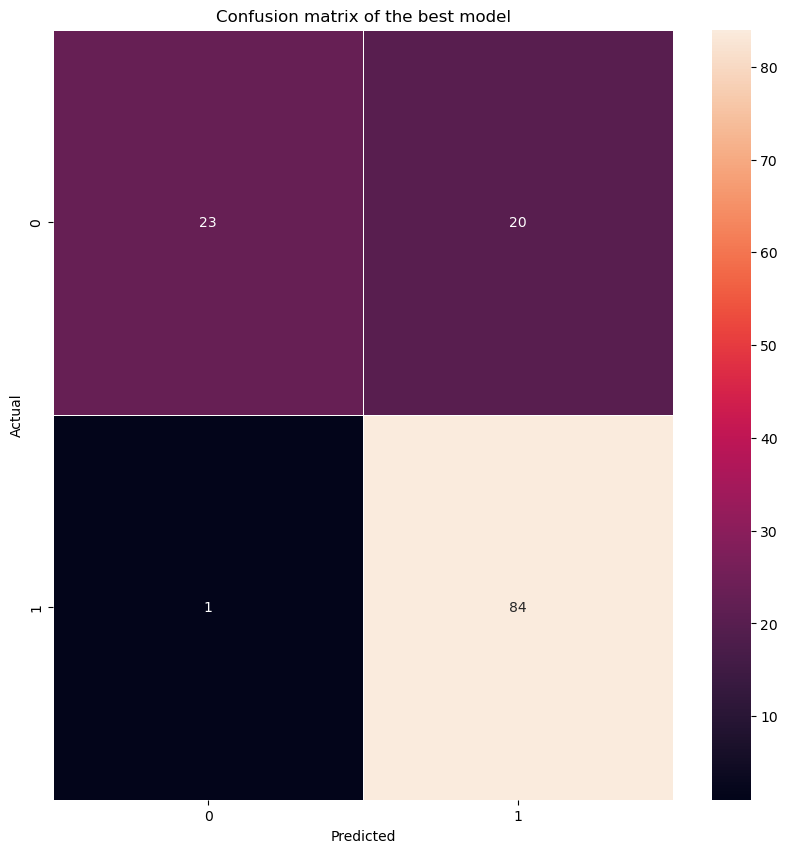

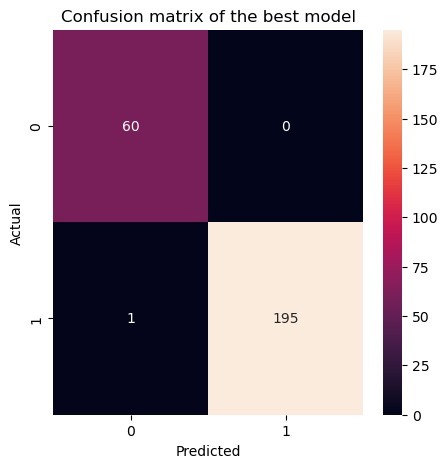

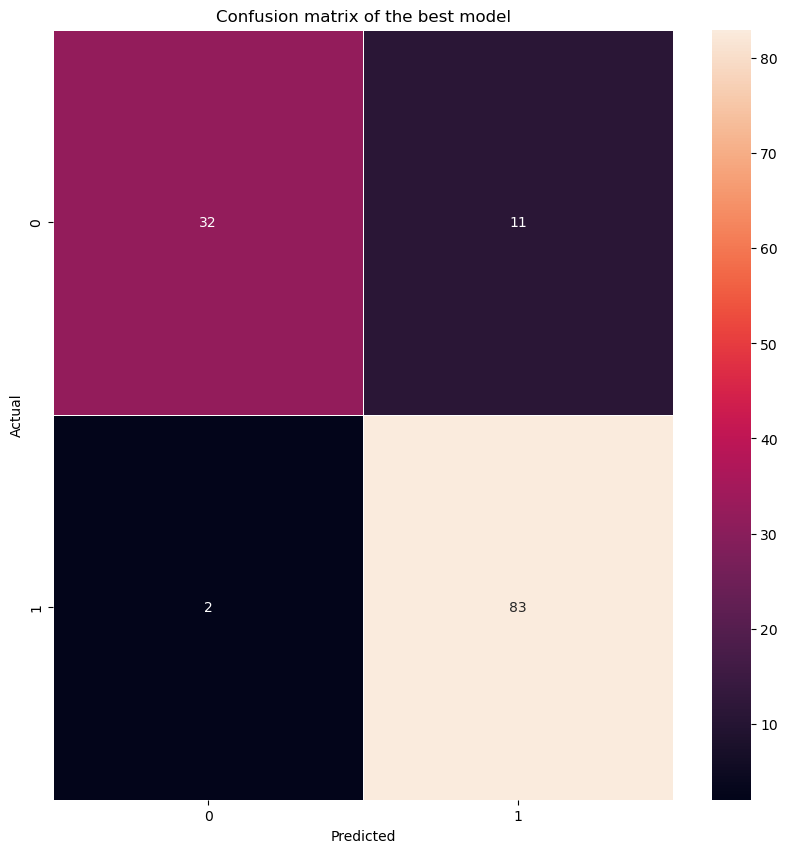

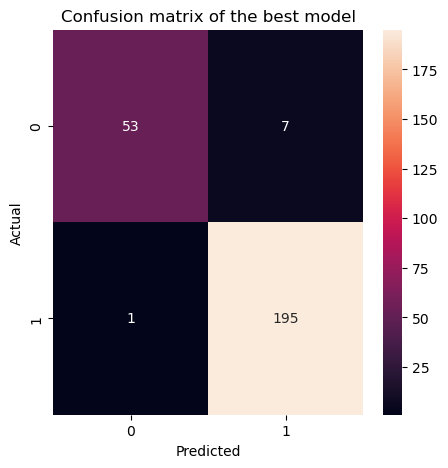

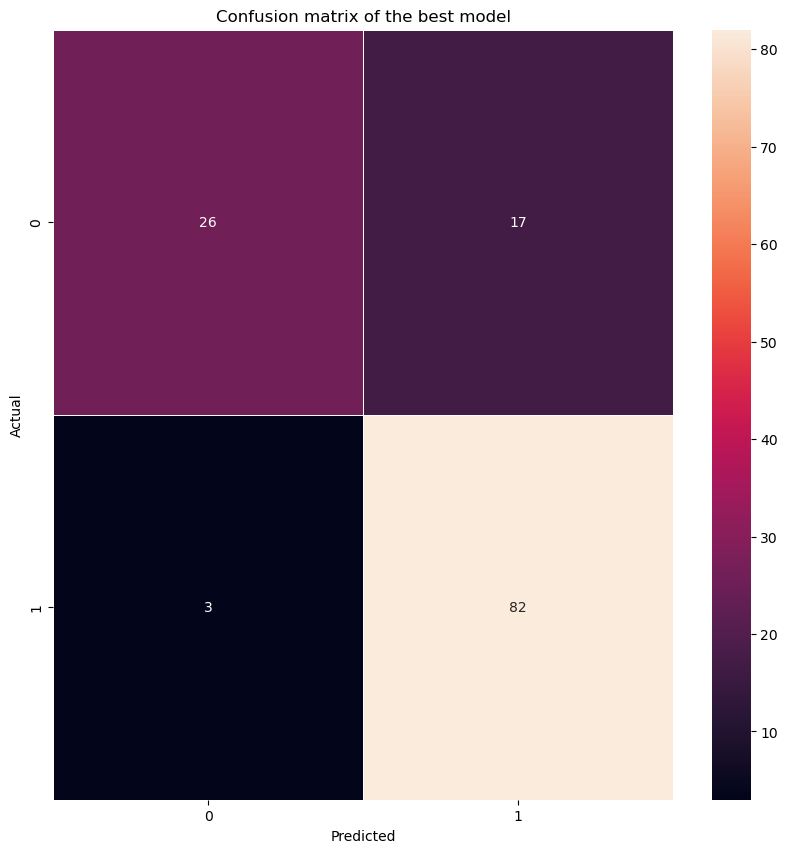

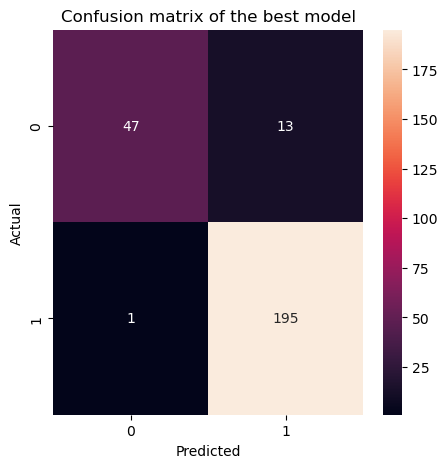

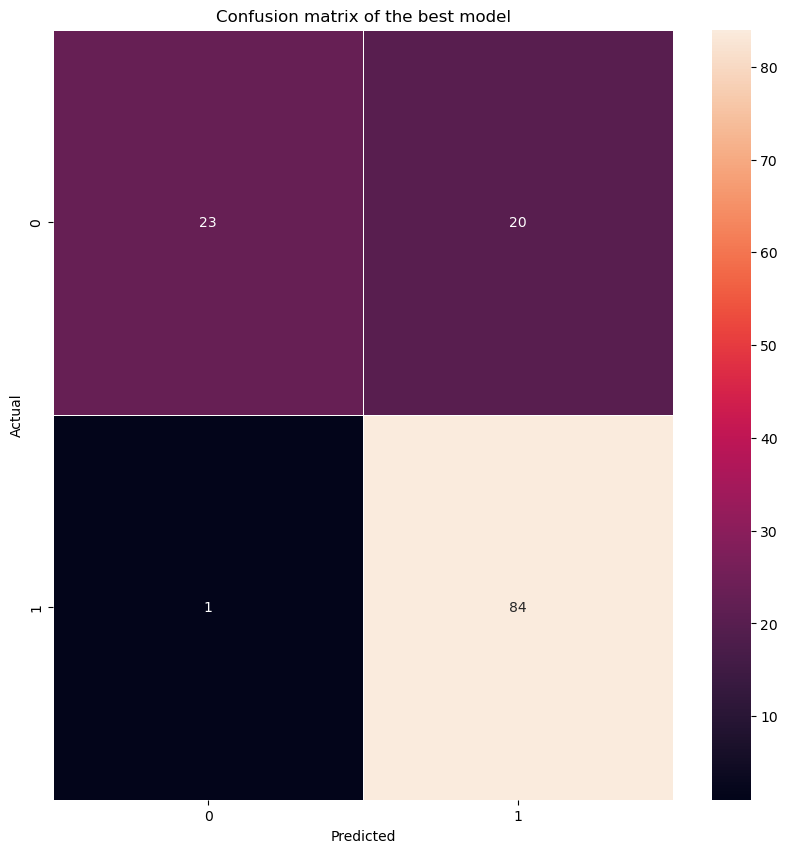

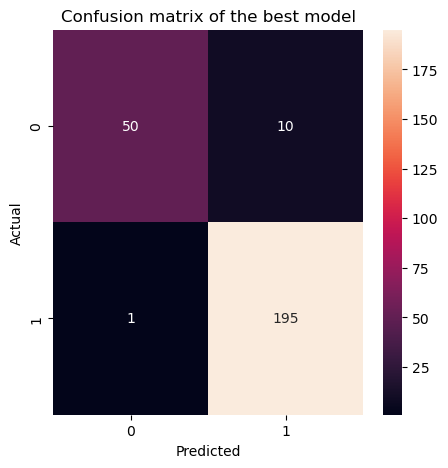

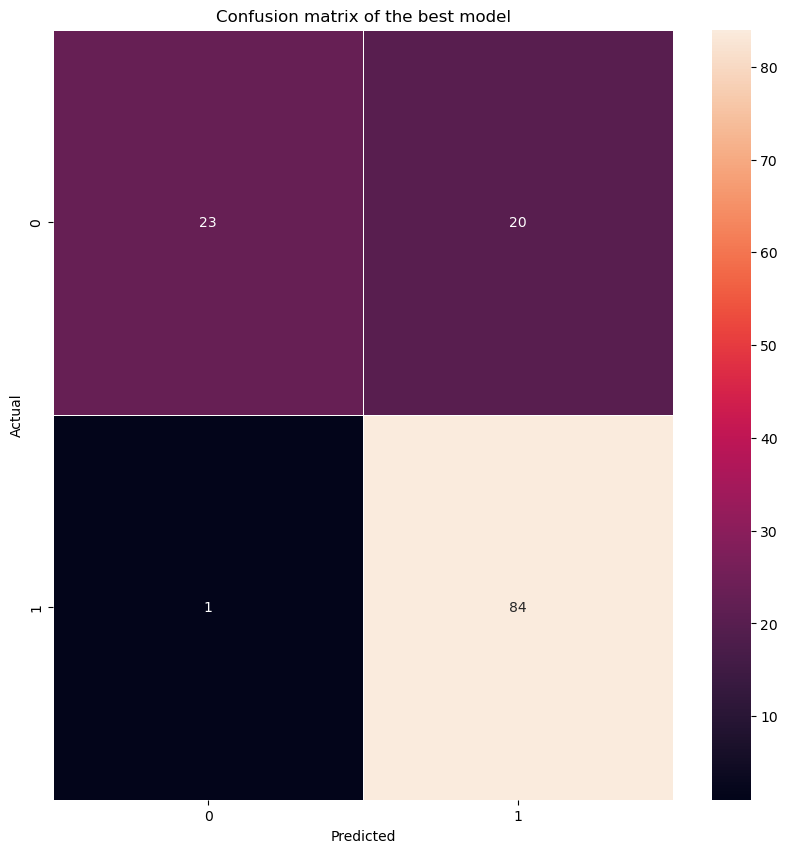

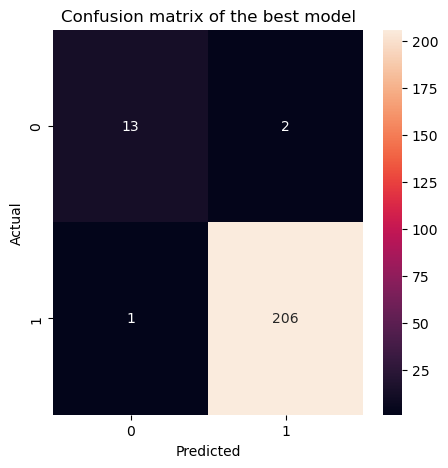

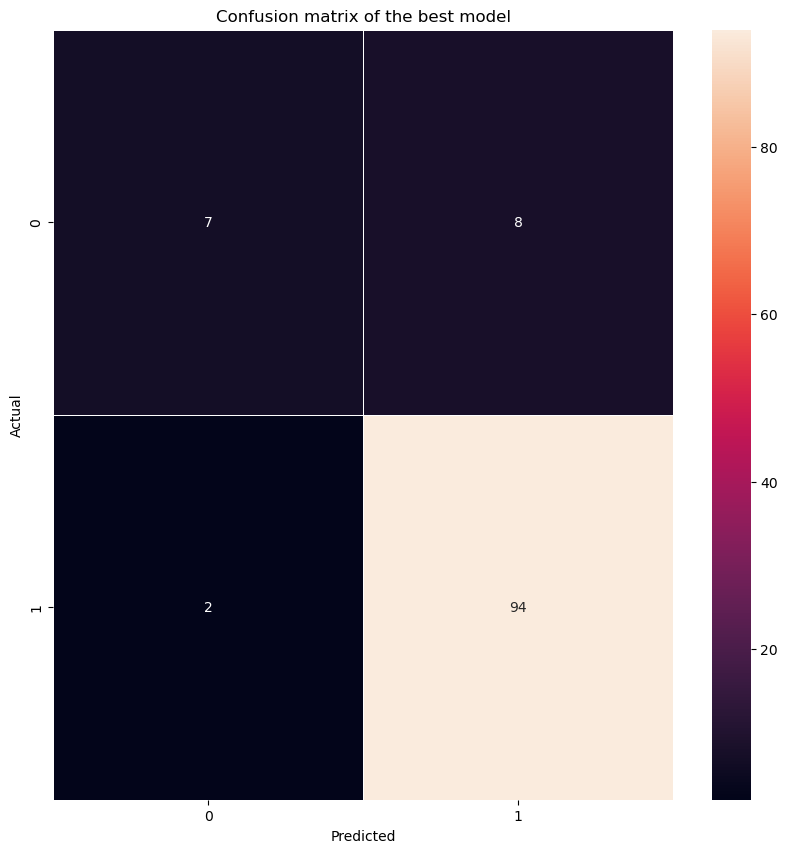

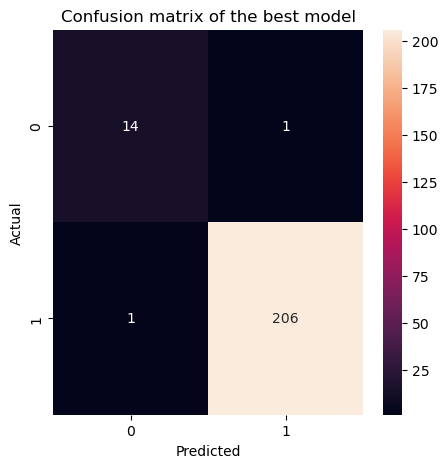

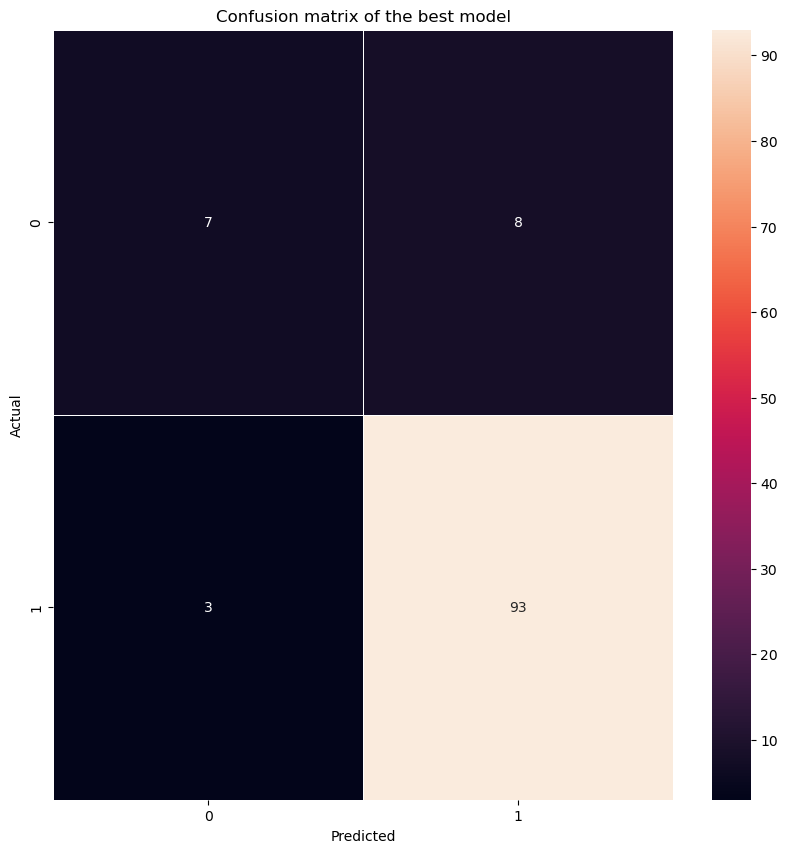

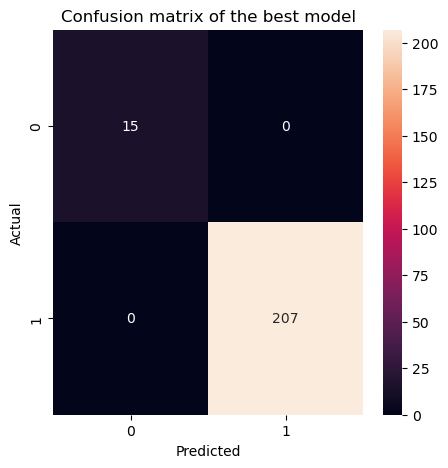

In [ ]:
target = 'Conversion'
target_threshold = 0.8
scoring = 'balanced_accuracy'
train_splits = 5
n_jobs = 4
binary = True
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = True

# loop over all substrate/ligand representations
# collect mean and std of test performance during training per representation for plotting
list_of_test_scores_mean = []
list_of_test_scores_std = []
test_performance = []
res_df = pd.DataFrame(np.zeros((len(AVAILABLE_LIGAND_REPRESENTATION_TYPES),len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES))), 
             index = AVAILABLE_LIGAND_REPRESENTATION_TYPES,
            columns = AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)

for selected_ligand_representations in AVAILABLE_LIGAND_REPRESENTATION_TYPES:
    
    list_of_test_scores_mean_l = []
    list_of_test_scores_std_l = []
    test_performance_l = []

    for selected_substrate_representations in AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES:
        print(f'{selected_ligand_representations} + {selected_substrate_representations}')

        rf_model = RandomForestClassifier(random_state=42)
        print('Training and testing classifier')
        print(f'Test size in training (based on K-fold): {1/train_splits}')
        # do the same with general function predict_out_of_sample_substrate
        res = predict_out_of_sample_substrate([selected_ligand_representations], 
                                              [selected_substrate_representations], 
                                              ligand_numbers_column, 
                                              substrate_names_column, 
                                              target, target_threshold, 
                                              train_splits, 
                                              binary=binary, 
                                              list_of_training_substrates=list_of_training_substrates, 
                                              list_of_test_substrates=list_of_test_substrates, 
                                              rf_model=rf_model, 
                                              scoring=scoring, 
                                              print_ml_results=print_ml_results, 
                                              n_jobs=n_jobs, 
                                              plot_dendrograms=plot_dendrograms)
        
        list_of_test_scores_mean_l.append(res.training_test_scores_mean)
        list_of_test_scores_std_l.append(res.training_test_scores_std)
        test_performance_l.append(res.testing_performance_test)
        
        res_df.loc[selected_ligand_representations,selected_substrate_representations]=res.testing_performance_test
        
    list_of_test_scores_mean.append(list_of_test_scores_mean_l)
    list_of_test_scores_std.append(list_of_test_scores_std_l)
    test_performance.append(test_performance_l)

<Axes: >

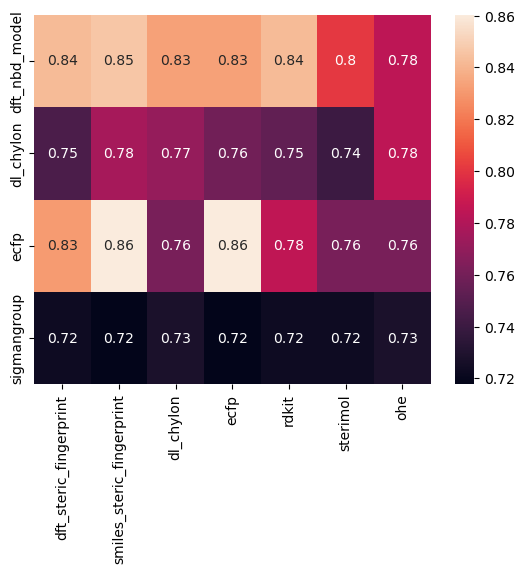

In [75]:
sns.heatmap(res_df, annot=True)

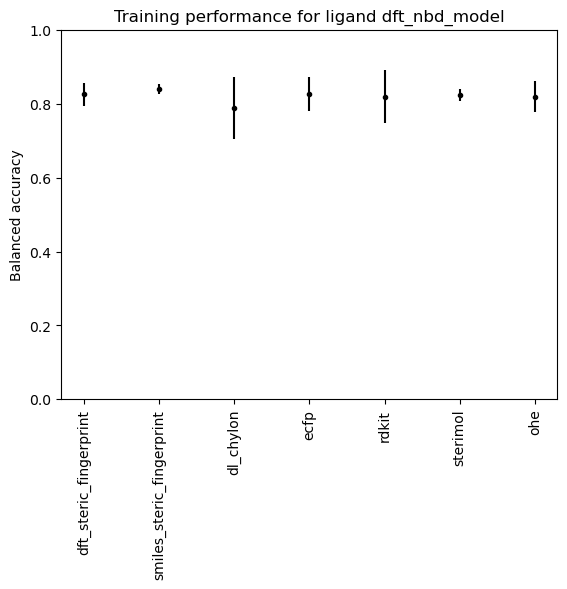

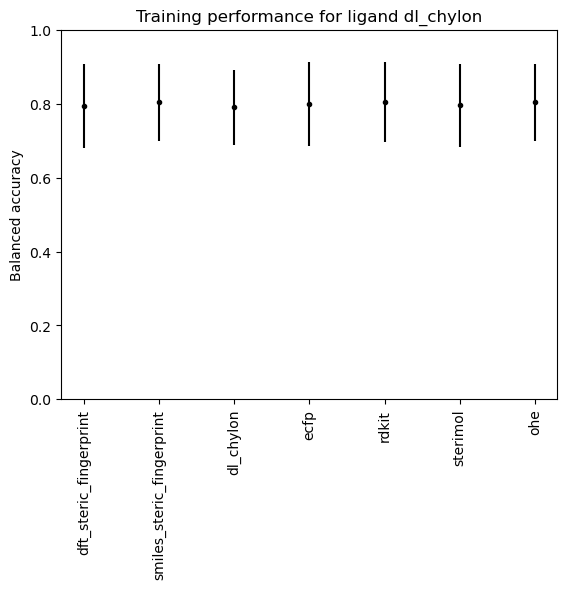

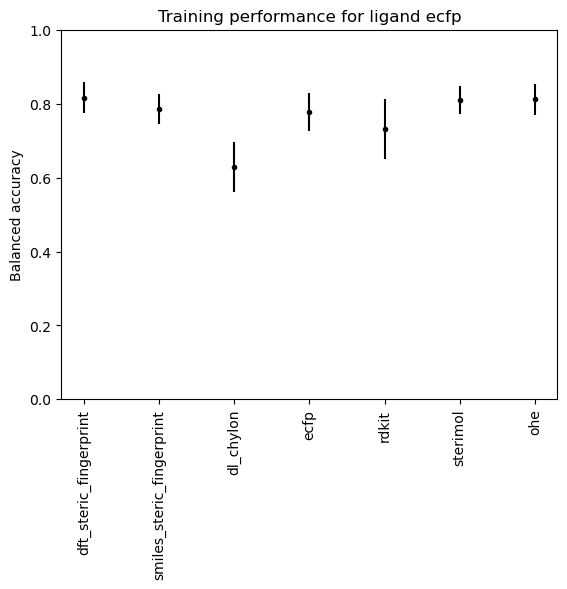

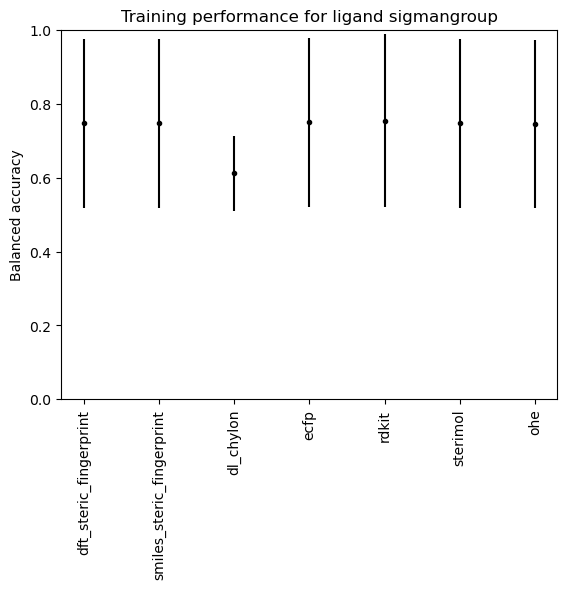

In [82]:
# plot test performance during training
for i, name in enumerate(AVAILABLE_LIGAND_REPRESENTATION_TYPES):
    fig, ax = plt.subplots()
    ax.set_title(f'Training performance for ligand {name}')
    ax.set_xticks(range(len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)))
    ax.set_xticklabels(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES, rotation=90)
    # set y range between 0 and 1
    ax.set_ylim([0, 1])
    ax.set_ylabel('Balanced accuracy')
    plt.errorbar(range(len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)), list_of_test_scores_mean[i], yerr=list_of_test_scores_std[i], fmt='.k')
    plt.show()

### Test effect of different substrate/ligand representations on regression

dft_nbd_model + dft_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + smiles_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + dl_chylon
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + ecfp
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + rdkit
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + sterimol
Training and testing regressor
Test size in training (based on K-fold): 0.2
dft_nbd_model + ohe
Training and testing regressor
Test size in training (based on K-fold): 0.2
dl_chylon + dft_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
dl_chylon + smiles_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
dl_chylon + dl_chylon
Training and testing regre

/projects/home/cvalsecc/repo/obelix-ml-pipeline/obelix_ml_pipeline/notebooks/../../obelix_ml_pipeline/machine_learning.py:114: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



sigmangroup + dft_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + smiles_steric_fingerprint
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + dl_chylon
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + ecfp
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + rdkit
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + sterimol
Training and testing regressor
Test size in training (based on K-fold): 0.2
sigmangroup + ohe
Training and testing regressor
Test size in training (based on K-fold): 0.2


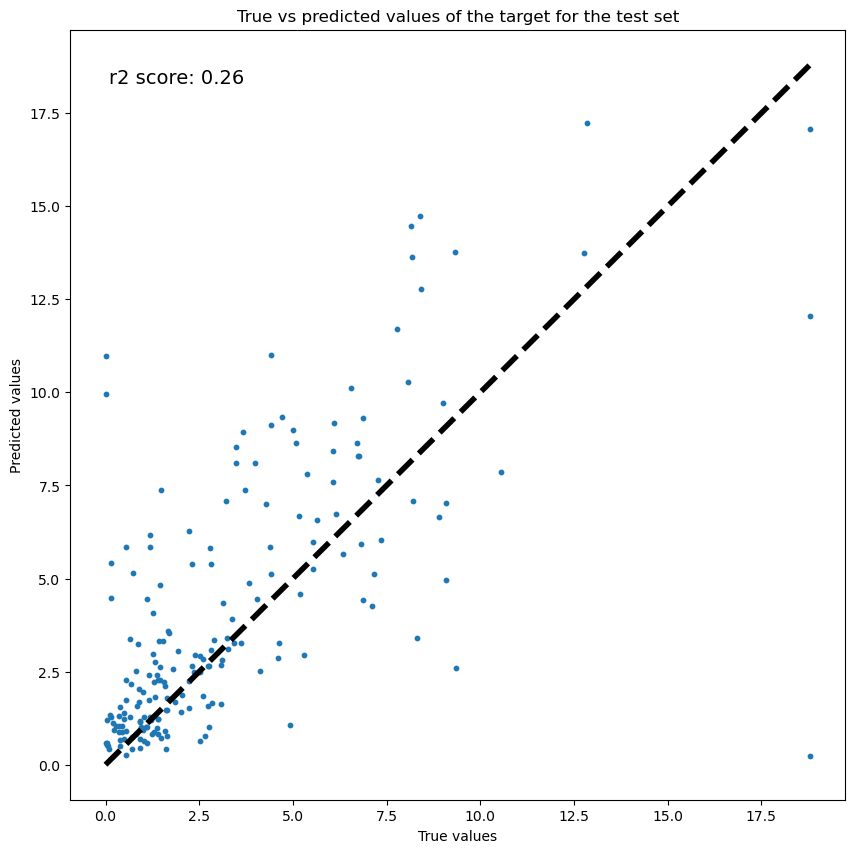

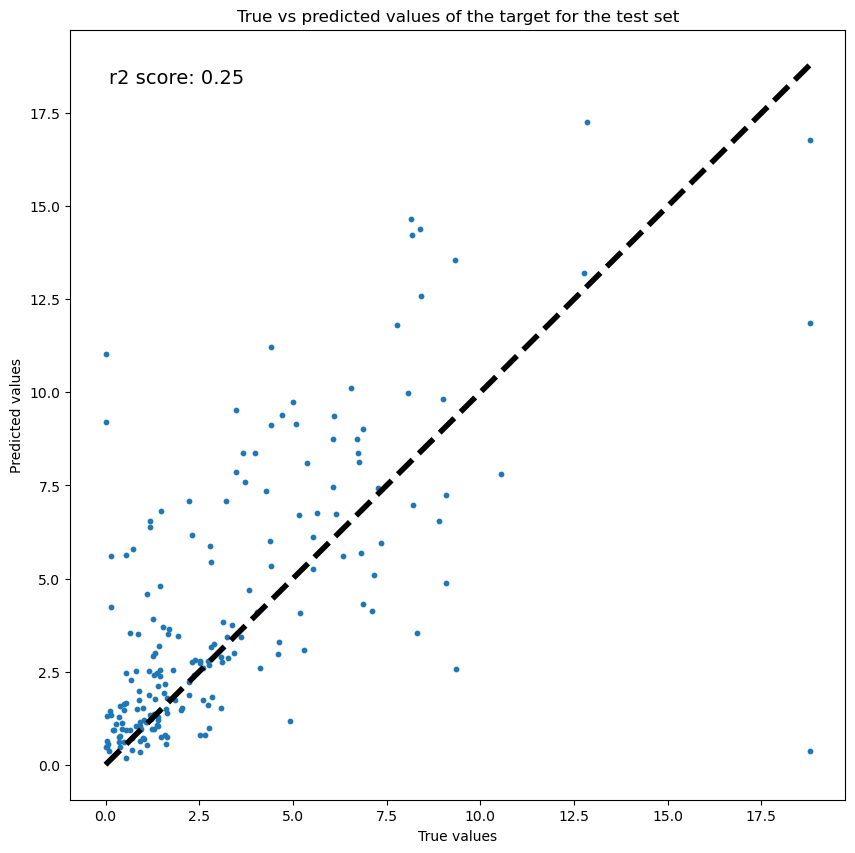

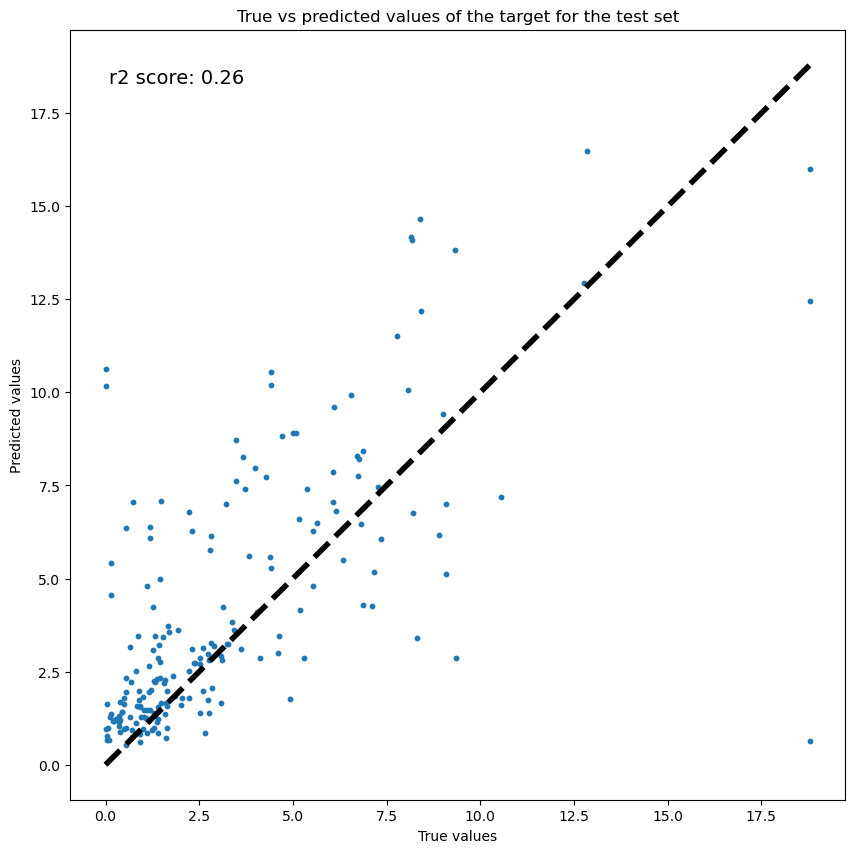

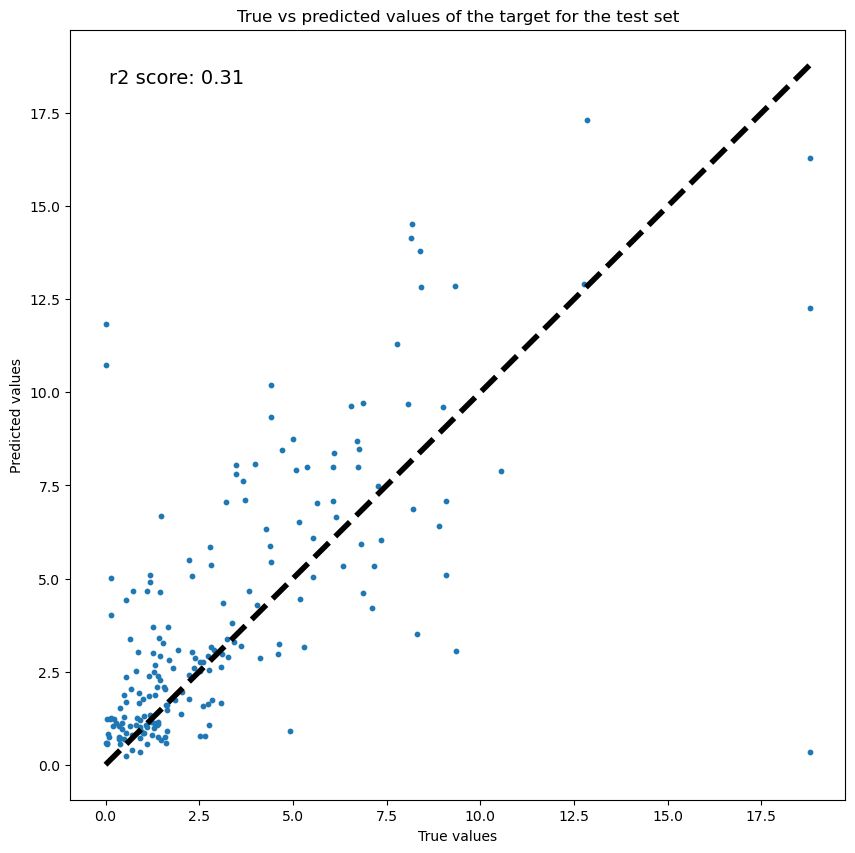

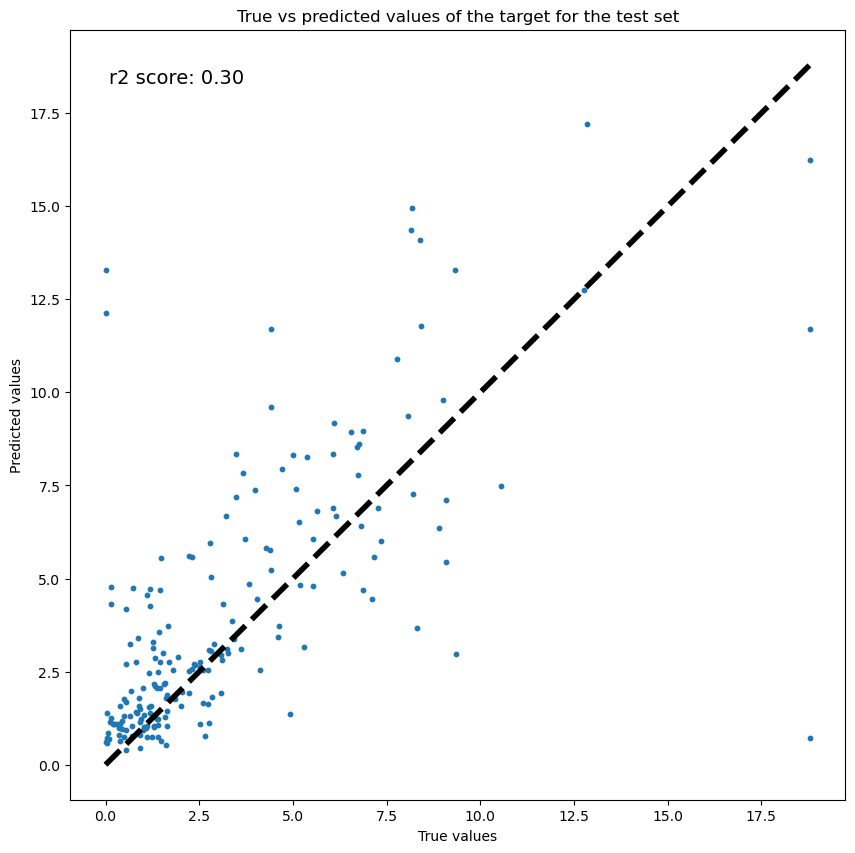

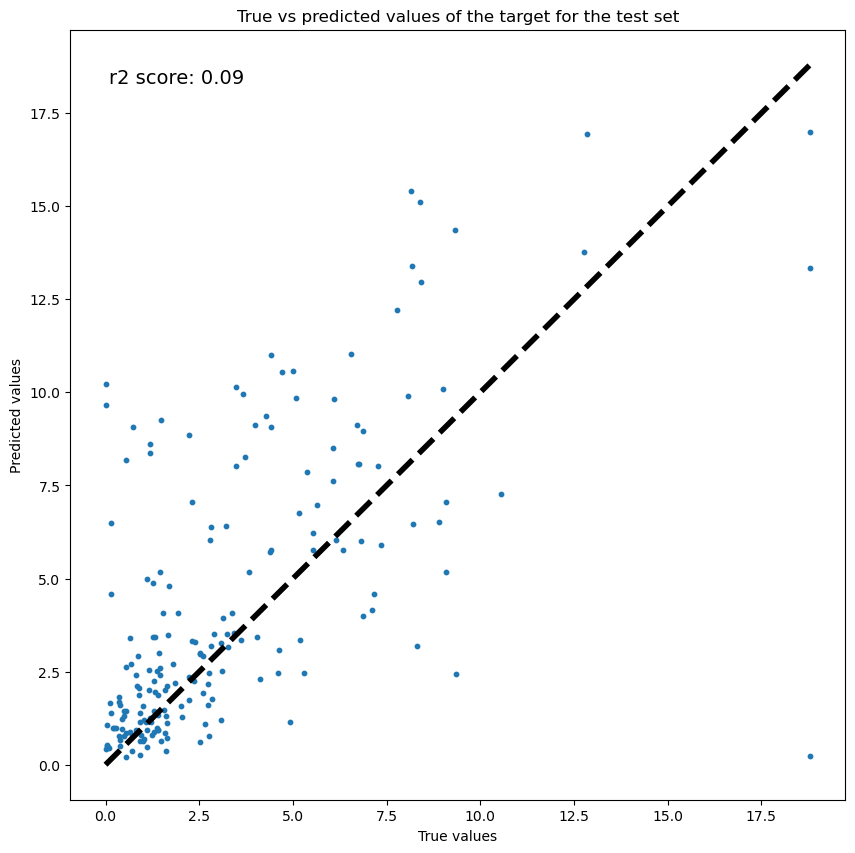

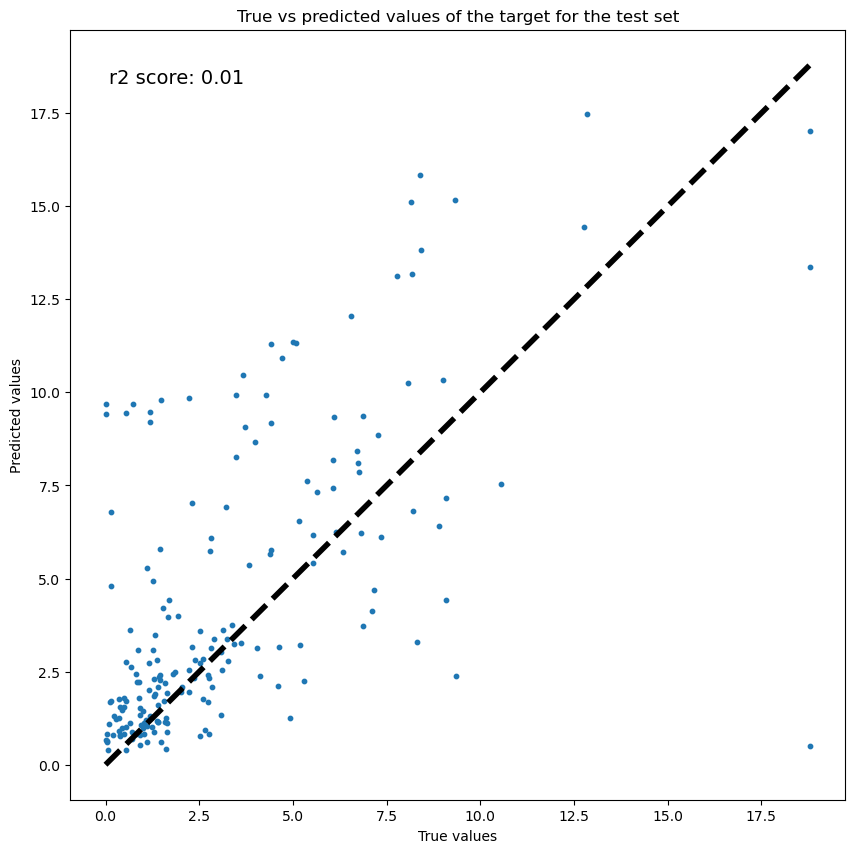

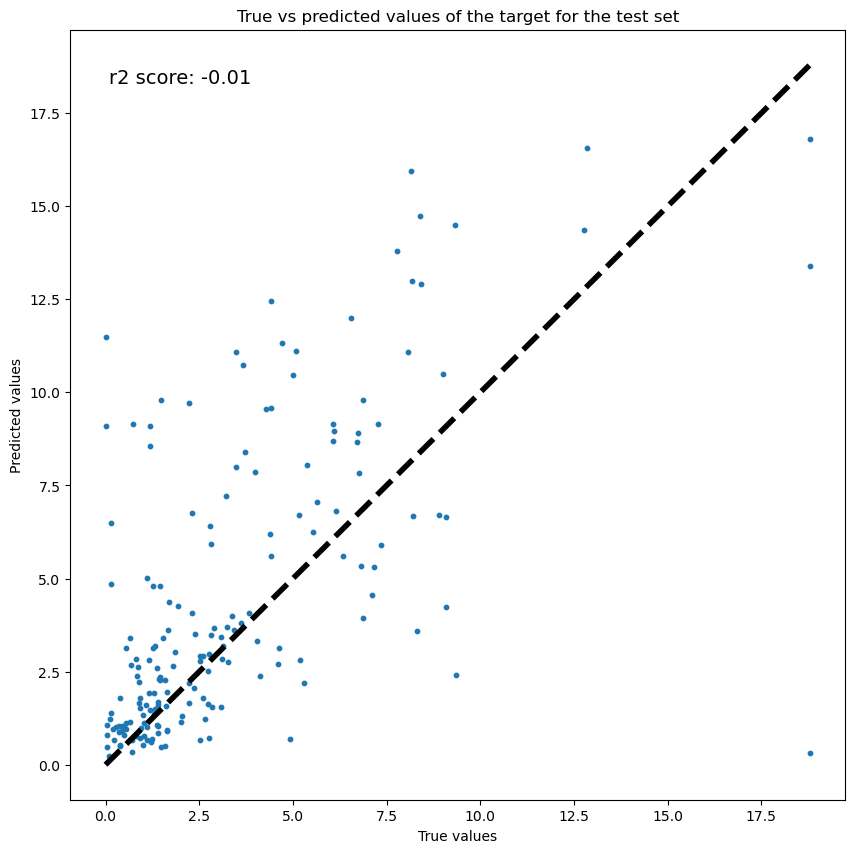

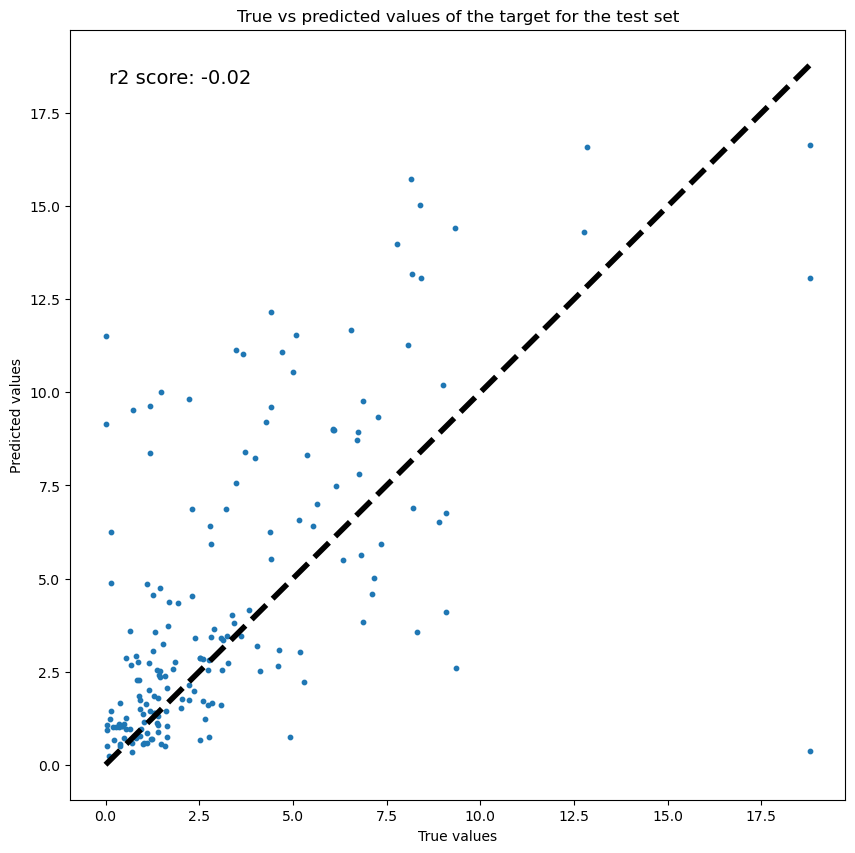

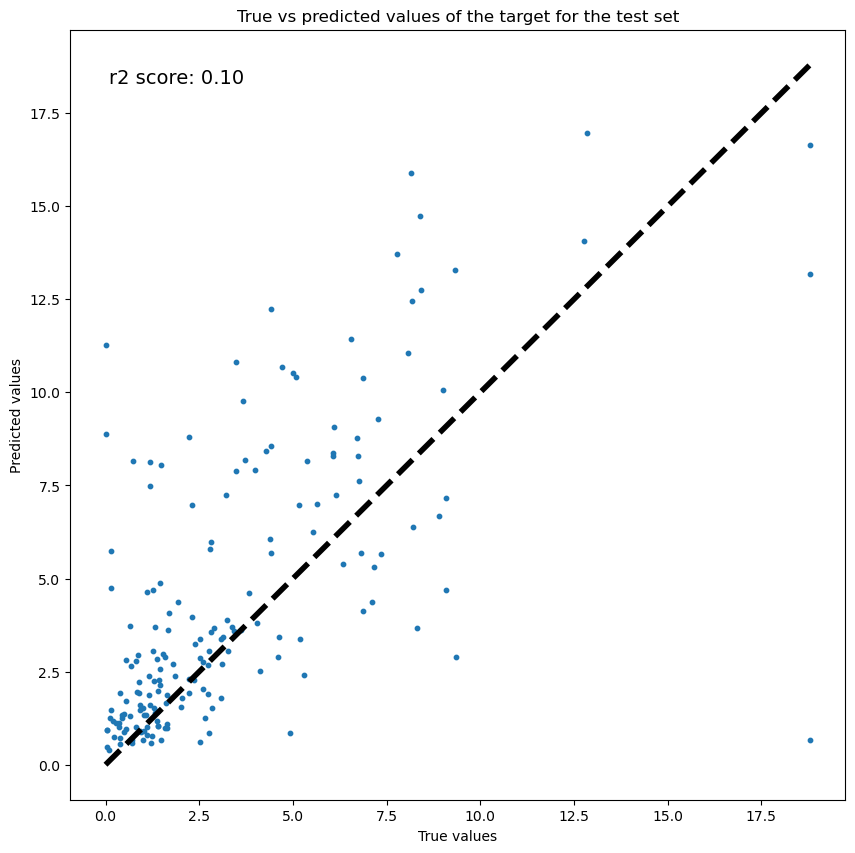

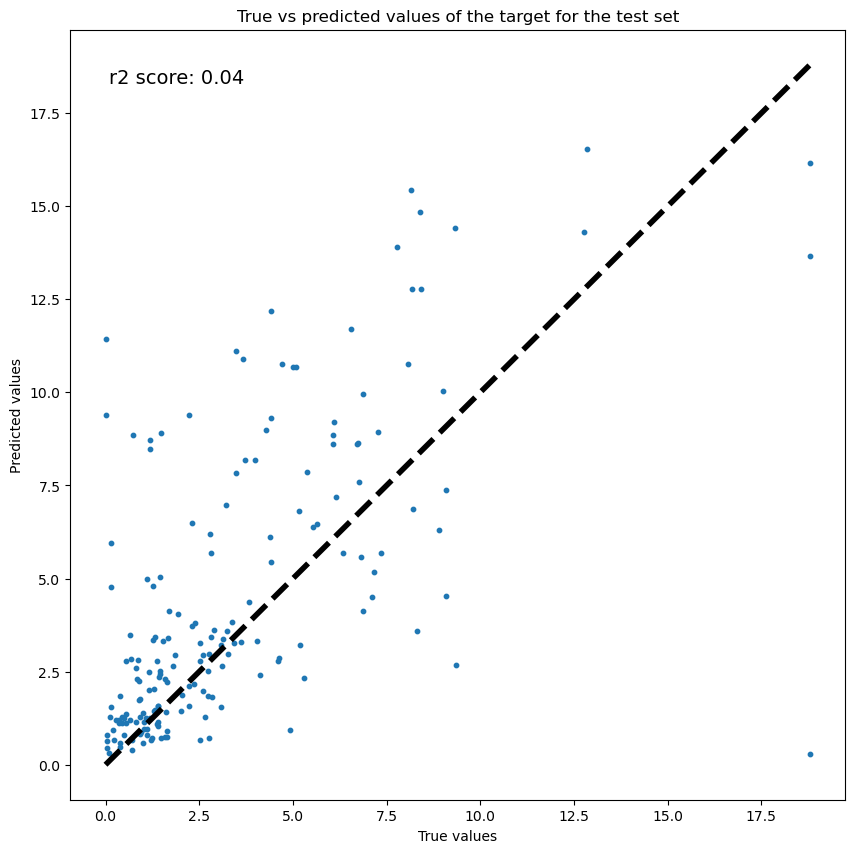

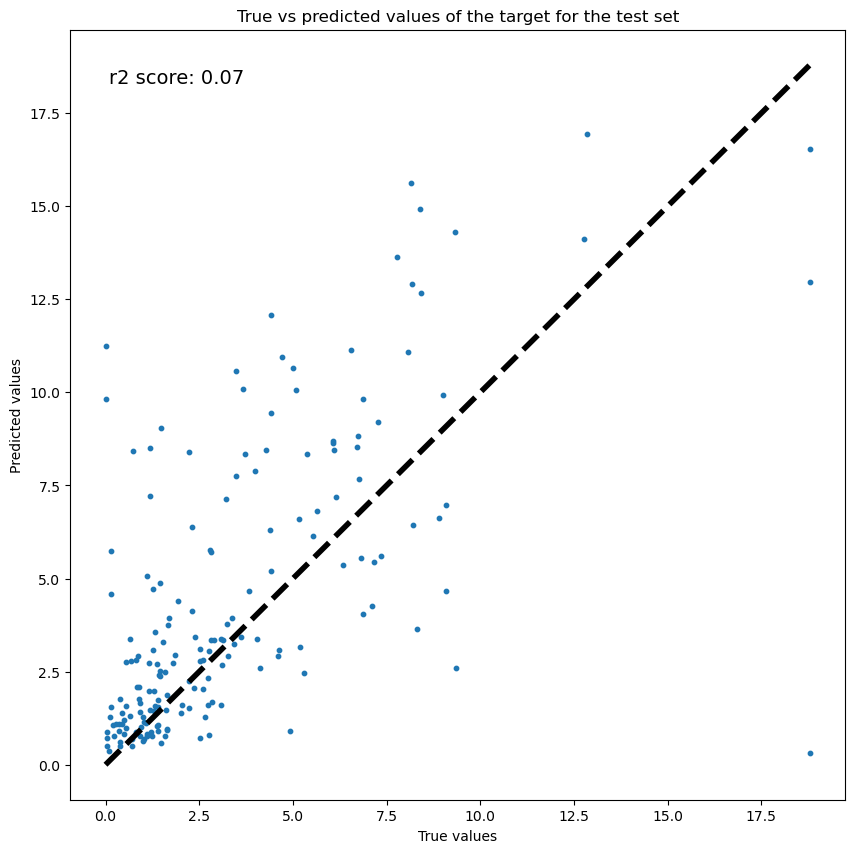

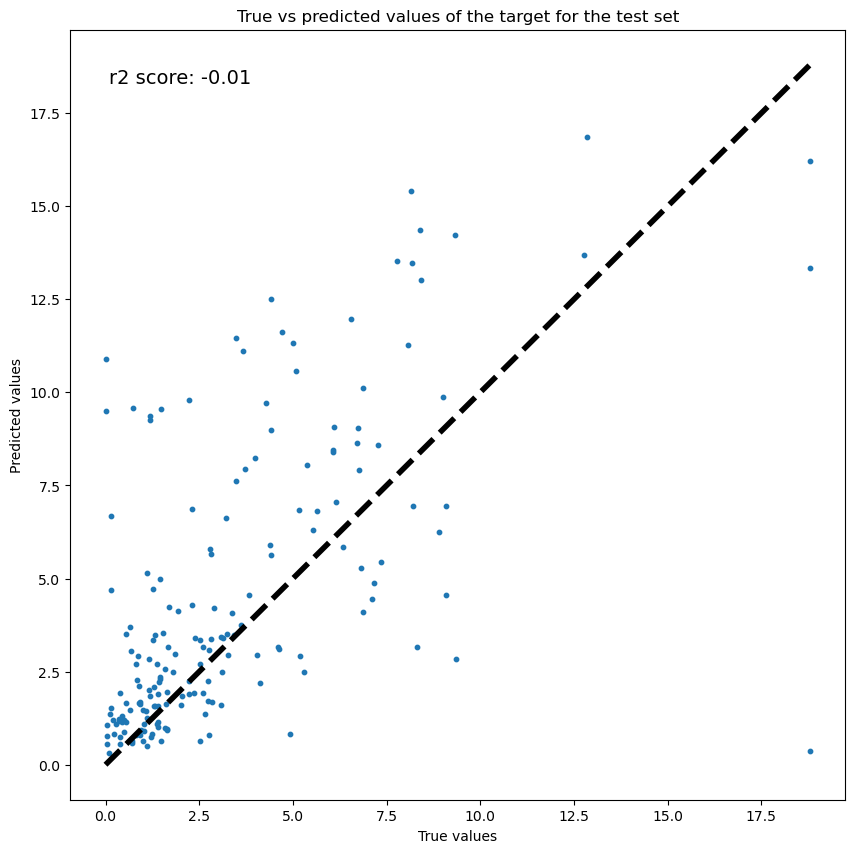

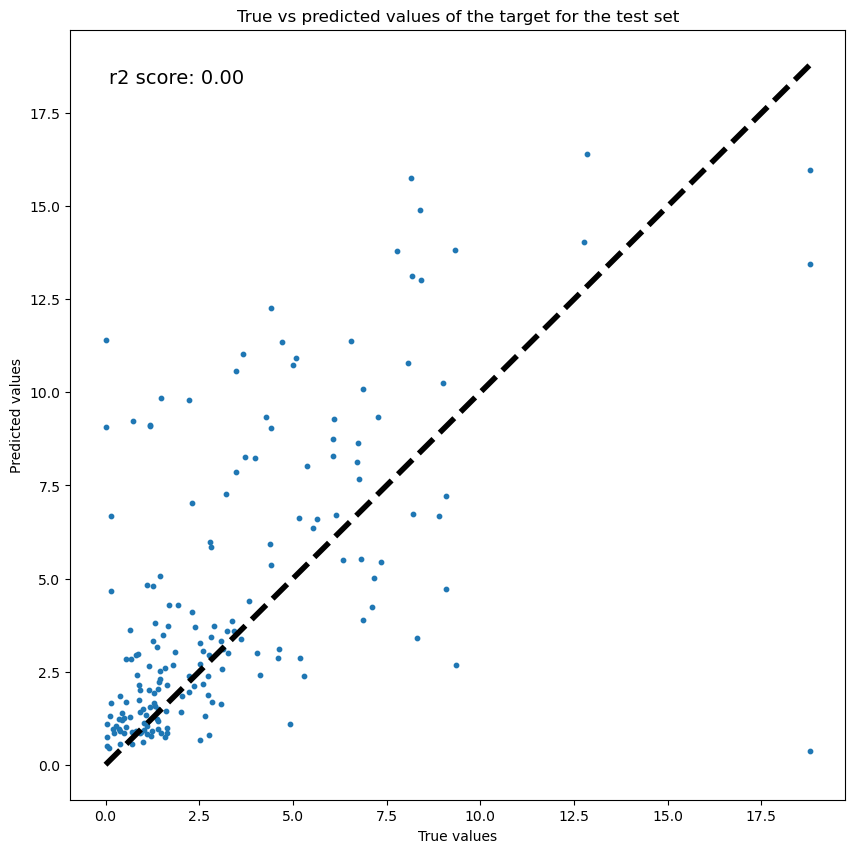

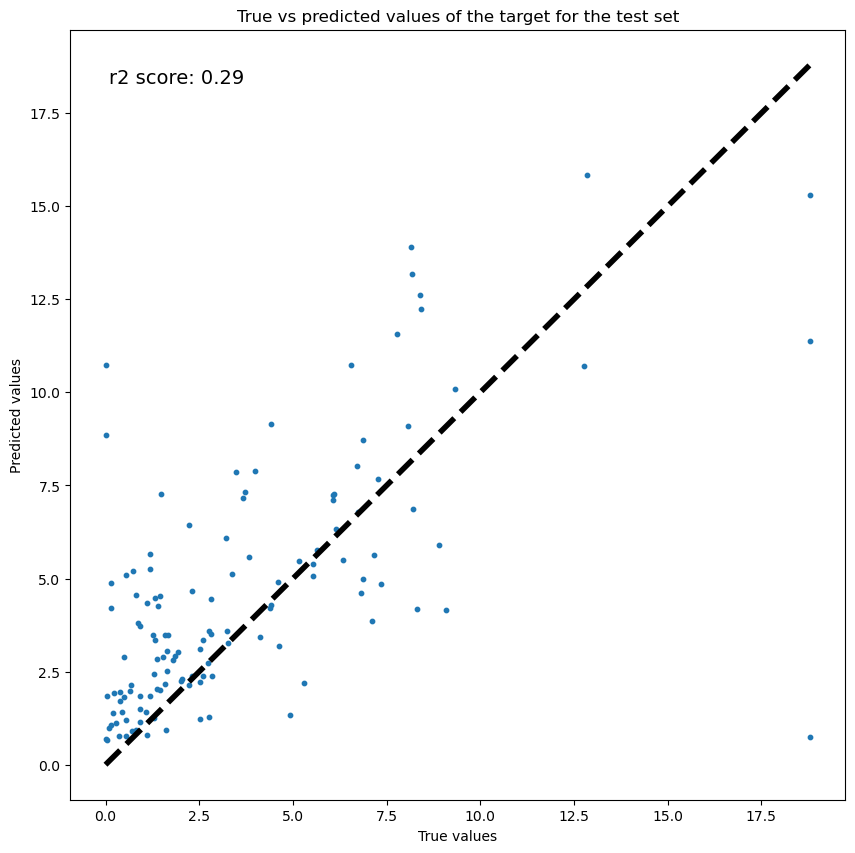

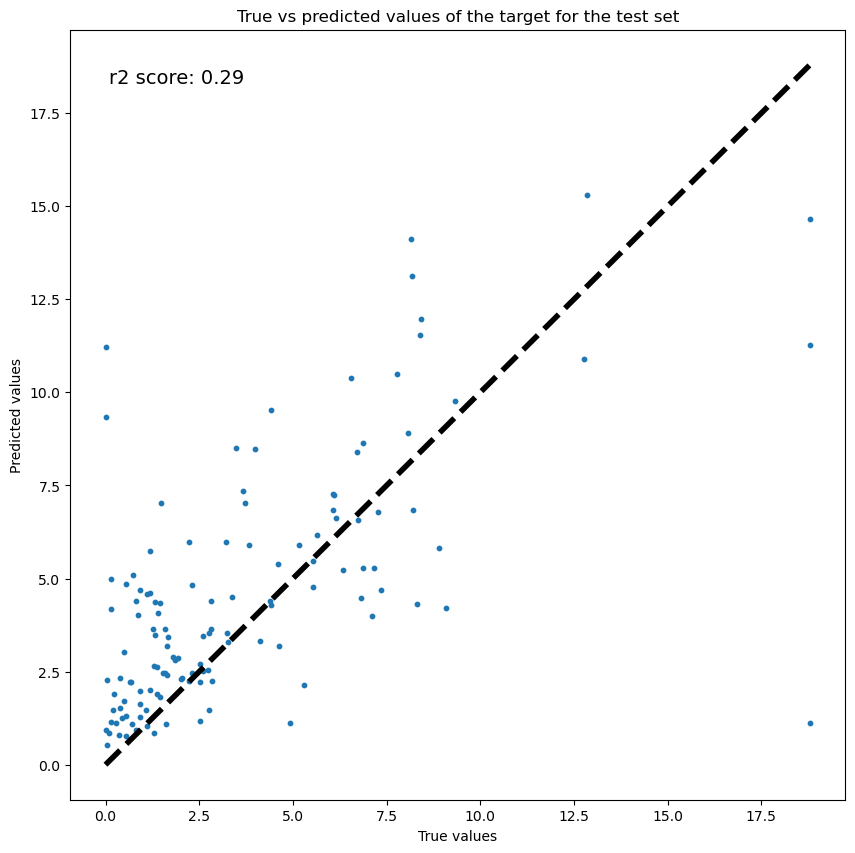

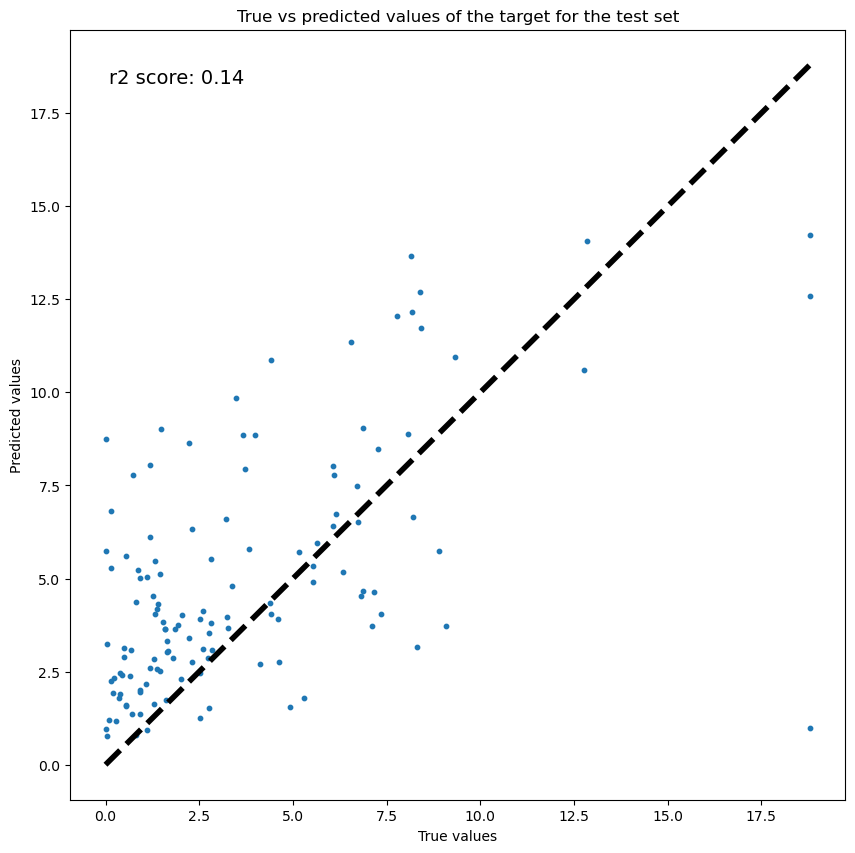

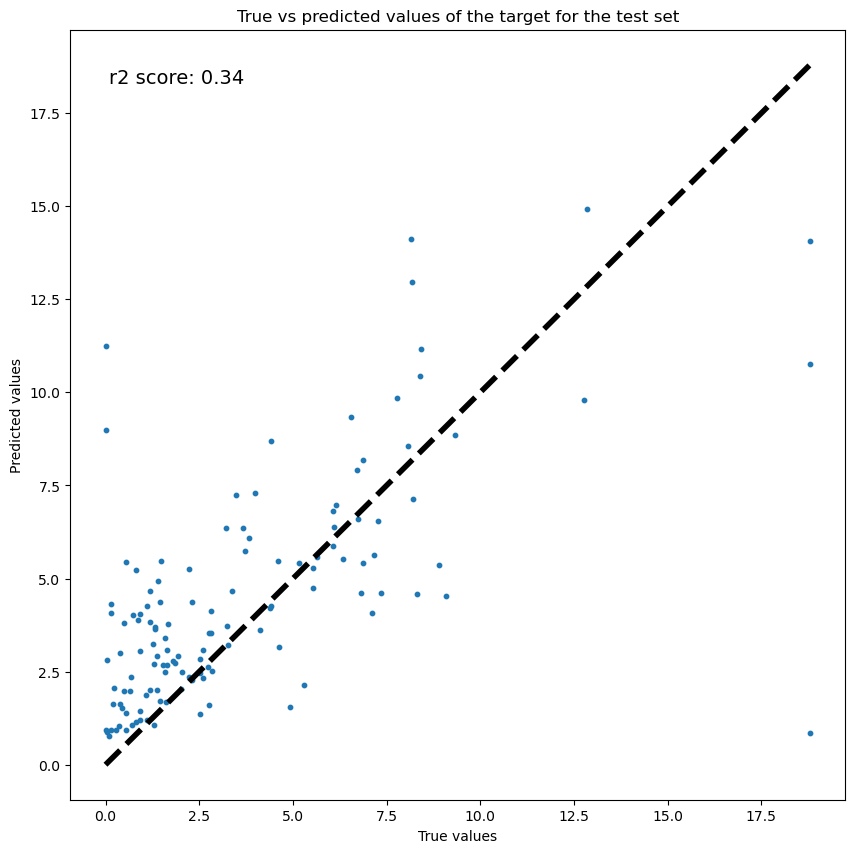

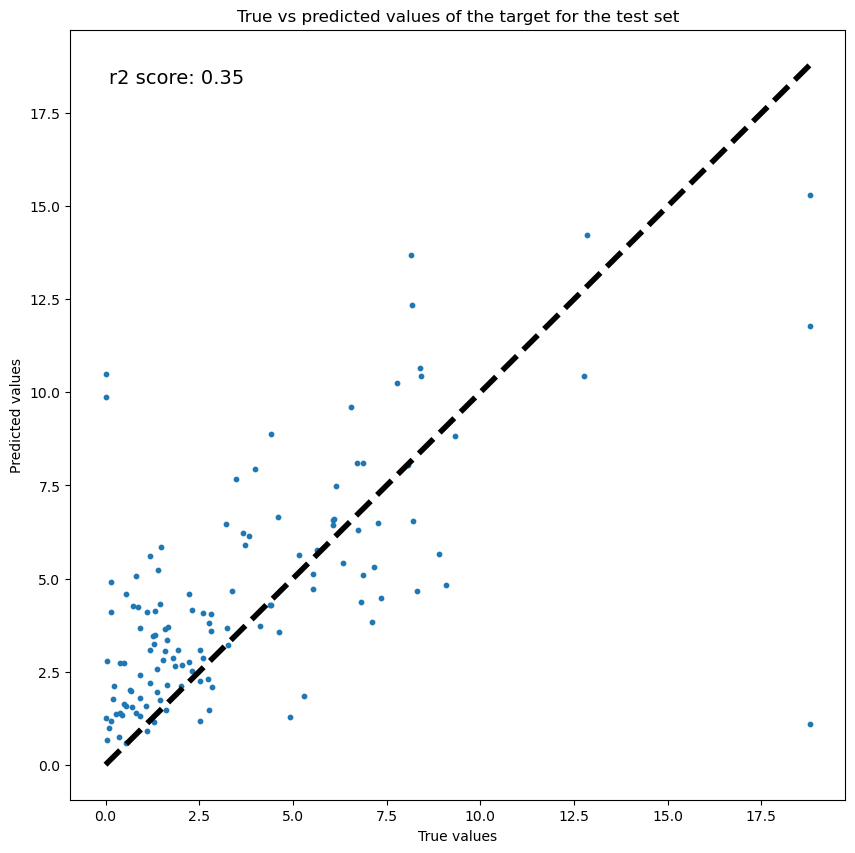

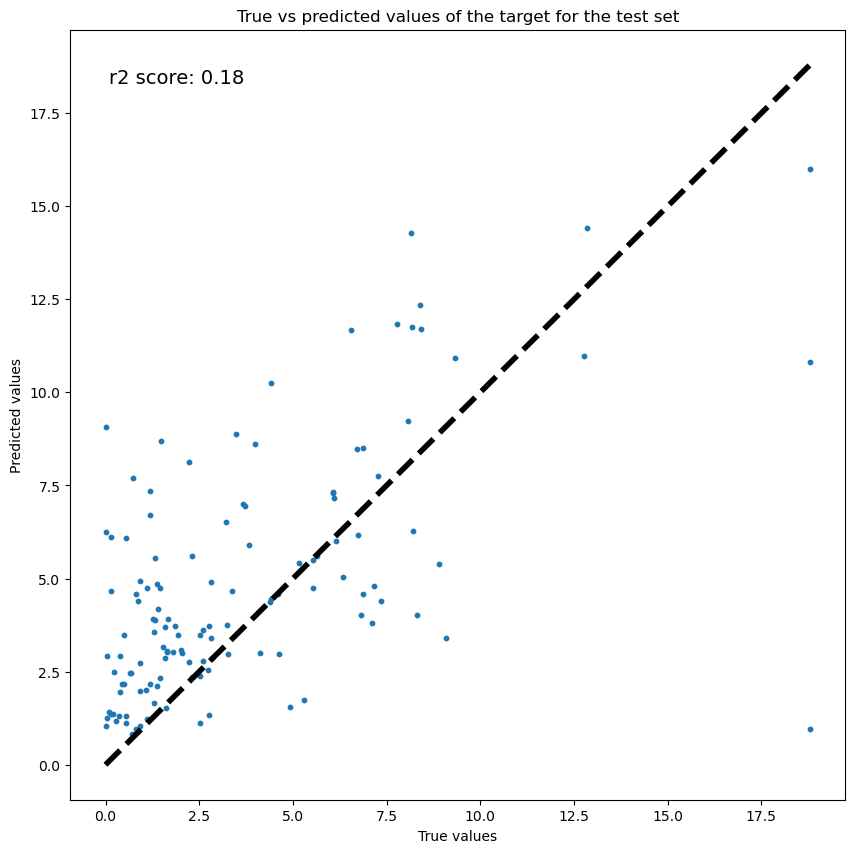

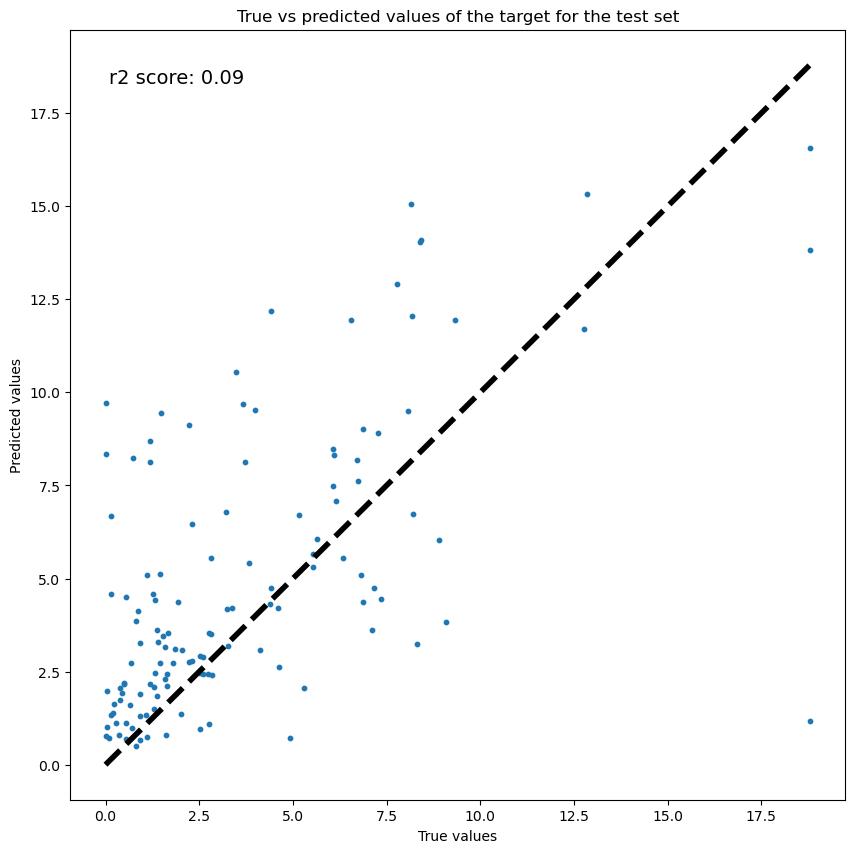

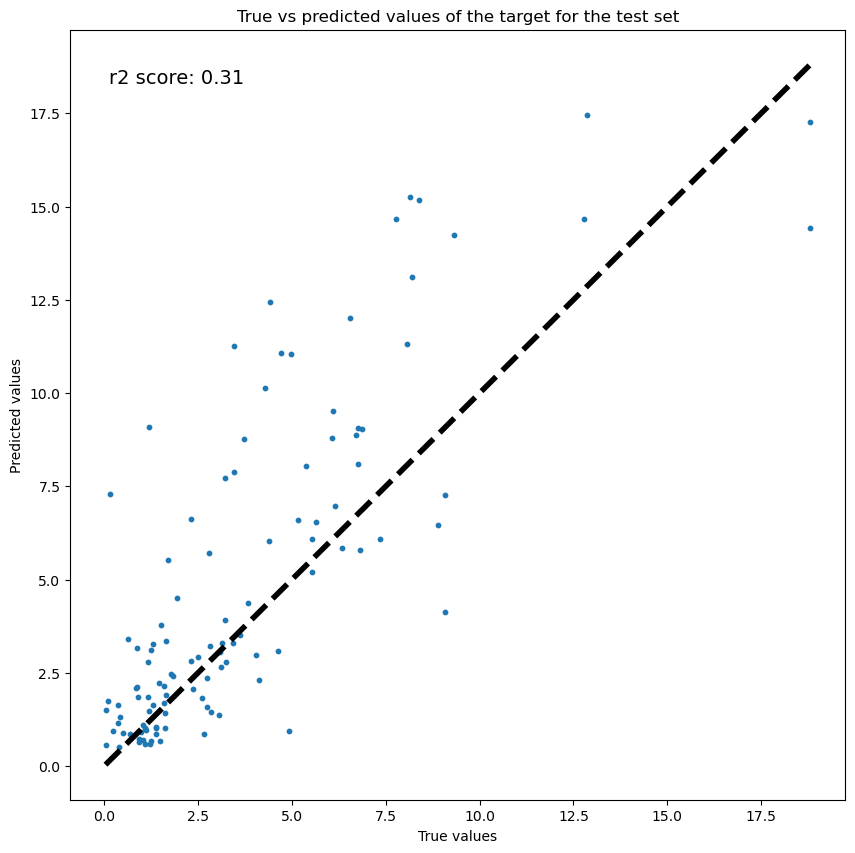

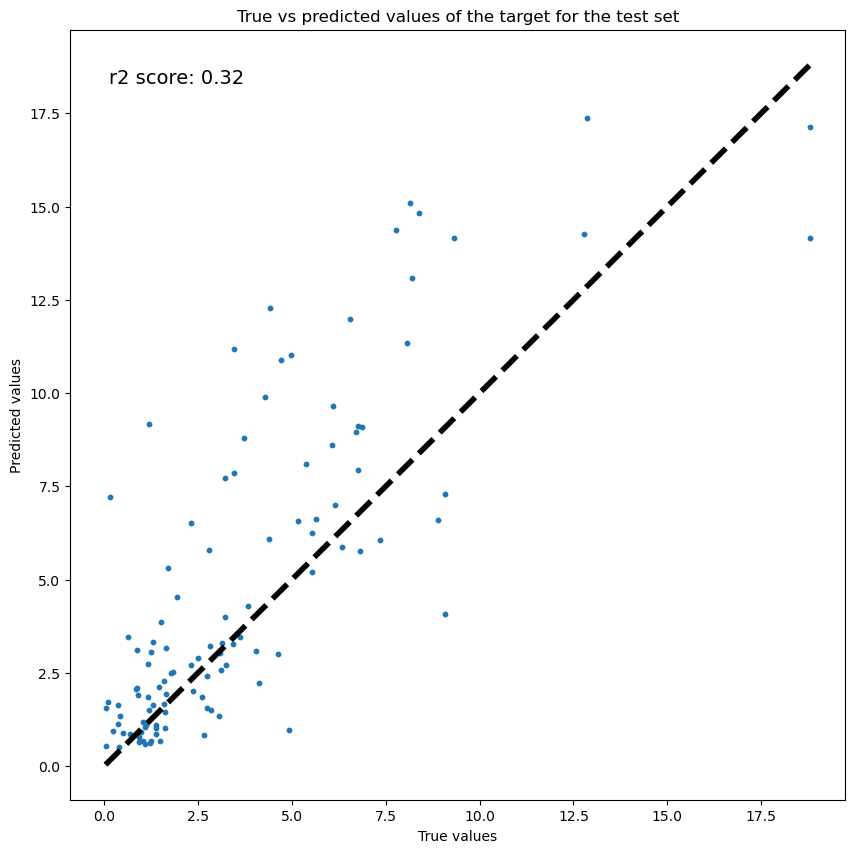

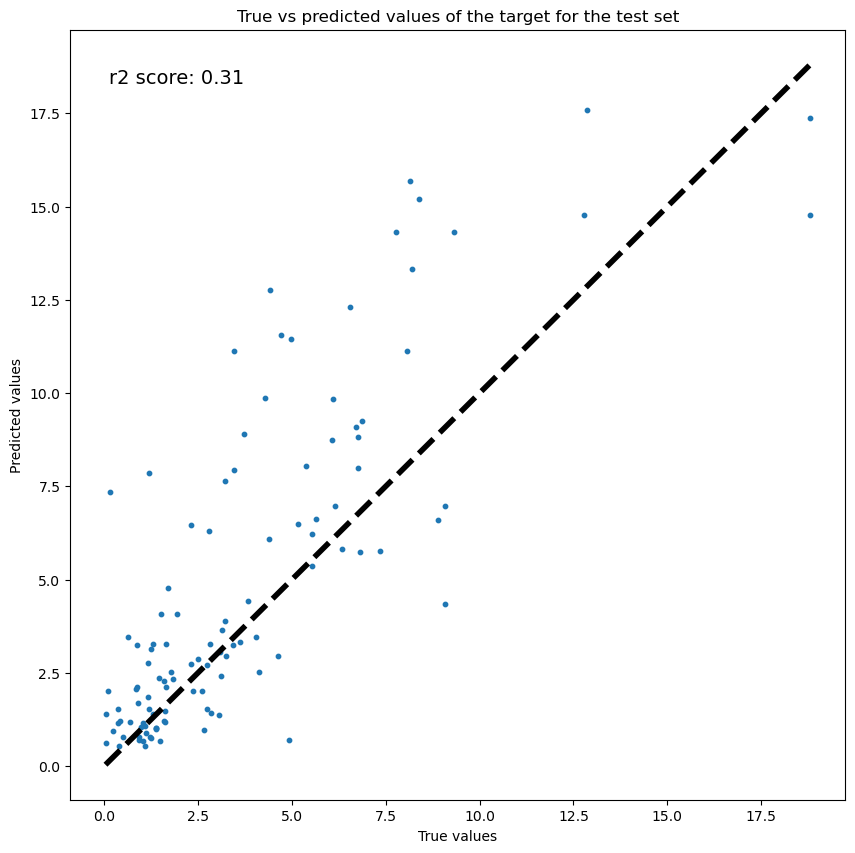

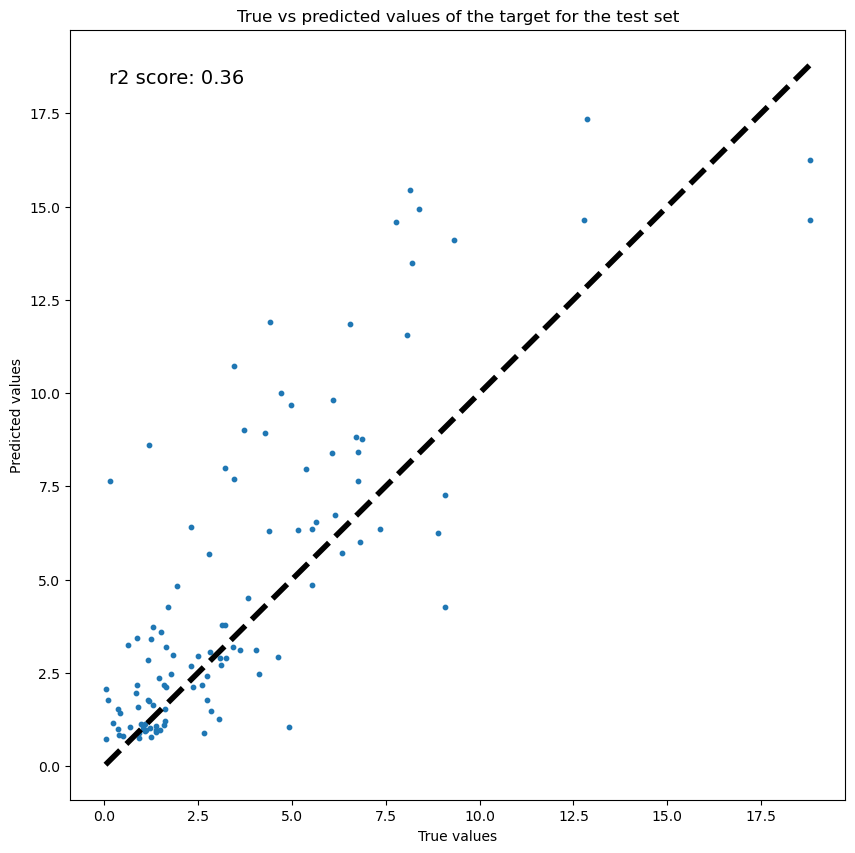

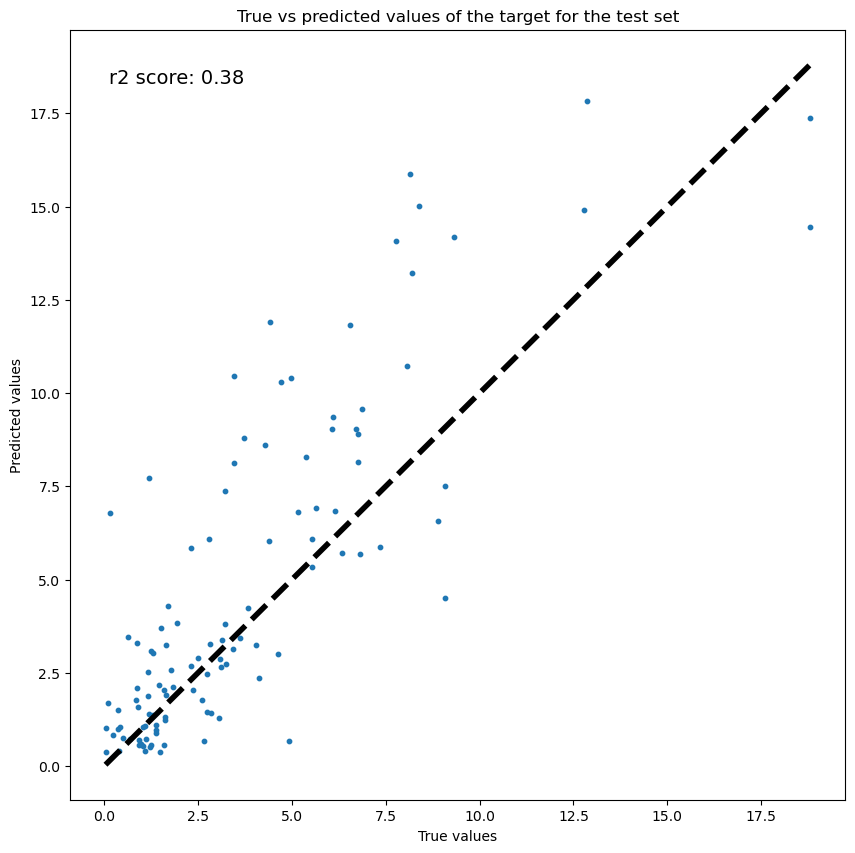

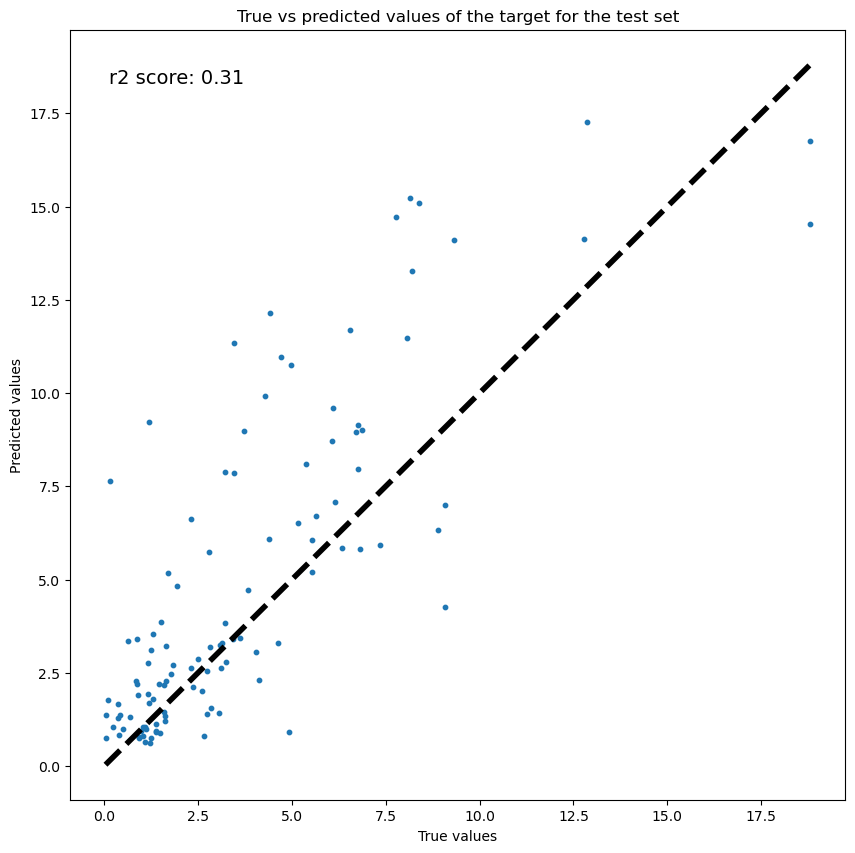

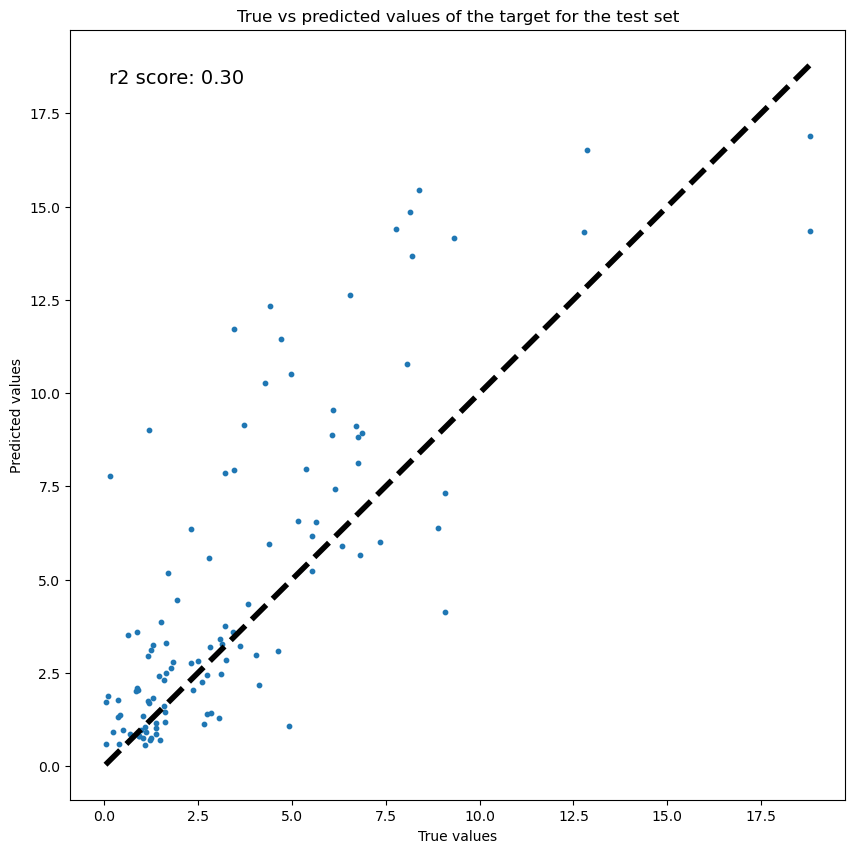

In [84]:
# try regression with loaded representations
target = 'DDG'
target_threshold = 0.6
scoring = 'r2'
train_splits = 5
n_jobs = 4
binary = False
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = False

# loop over all substrate/ligand representations
# collect mean and std of test performance during training per representation for plotting
list_of_test_scores_mean = []
list_of_test_scores_std = []
test_performance = []
res_df = pd.DataFrame(np.zeros((len(AVAILABLE_LIGAND_REPRESENTATION_TYPES),len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES))), 
             index = AVAILABLE_LIGAND_REPRESENTATION_TYPES,
            columns = AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)

for selected_ligand_representations in AVAILABLE_LIGAND_REPRESENTATION_TYPES:
    
    list_of_test_scores_mean_l = []
    list_of_test_scores_std_l = []
    test_performance_l = []

    for selected_substrate_representations in AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES:
        print(f'{selected_ligand_representations} + {selected_substrate_representations}')

        rf_model = RandomForestRegressor(random_state=42)
        print('Training and testing regressor')
        print(f'Test size in training (based on K-fold): {1/train_splits}')
        # do the same with general function predict_out_of_sample_substrate
        res = predict_out_of_sample_substrate([selected_ligand_representations], 
                                              [selected_substrate_representations], 
                                              ligand_numbers_column, 
                                              substrate_names_column, 
                                              target, target_threshold, 
                                              train_splits, 
                                              binary=binary, 
                                              list_of_training_substrates=list_of_training_substrates, 
                                              list_of_test_substrates=list_of_test_substrates, 
                                              rf_model=rf_model, 
                                              scoring=scoring, 
                                              print_ml_results=print_ml_results, 
                                              n_jobs=n_jobs, 
                                              plot_dendrograms=plot_dendrograms)
        
        list_of_test_scores_mean_l.append(res.training_test_scores_mean)
        list_of_test_scores_std_l.append(res.training_test_scores_std)
        test_performance_l.append(res.testing_performance_test)
        
        res_df.loc[selected_ligand_representations,selected_substrate_representations]=res.testing_performance_test
        
    list_of_test_scores_mean.append(list_of_test_scores_mean_l)
    list_of_test_scores_std.append(list_of_test_scores_std_l)
    test_performance.append(test_performance_l)

<Axes: >

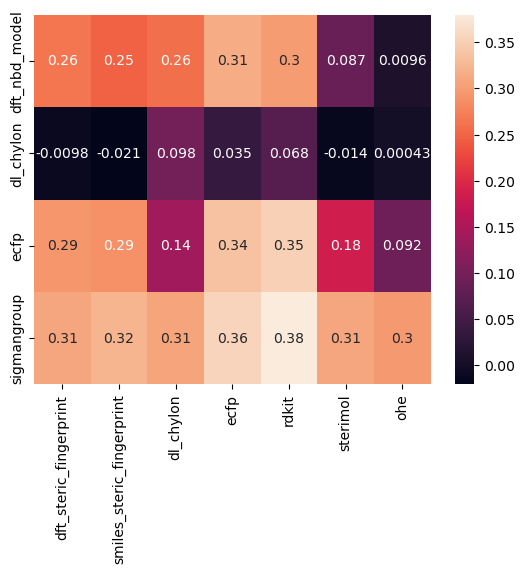

In [85]:
sns.heatmap(res_df, annot=True)

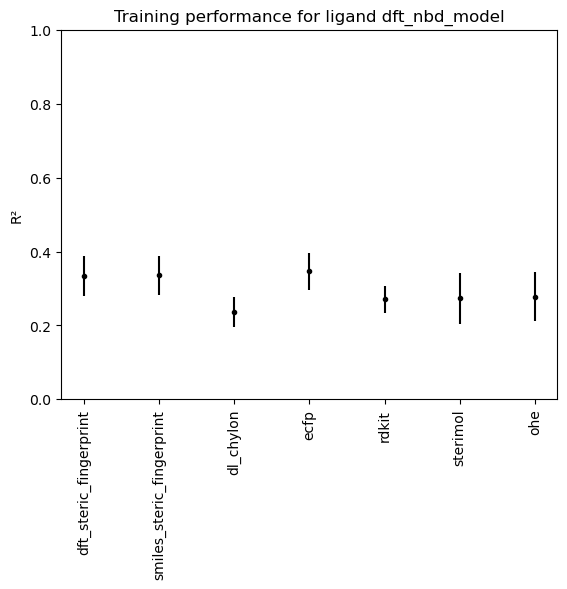

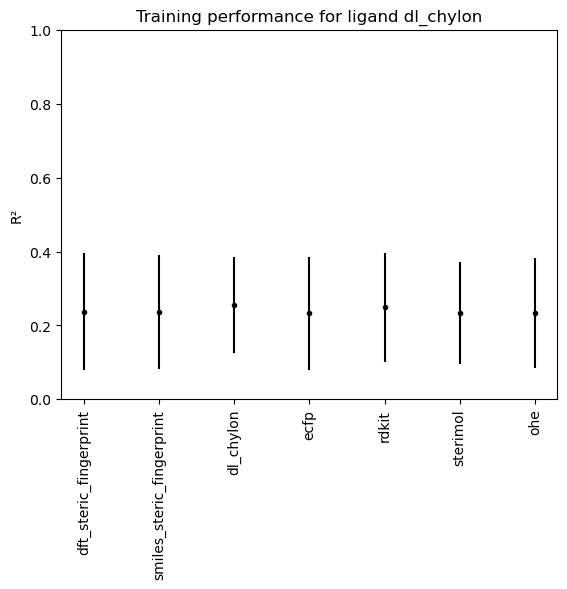

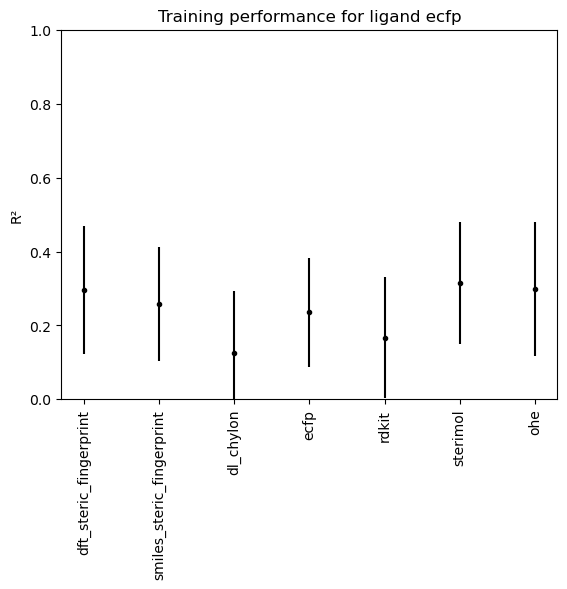

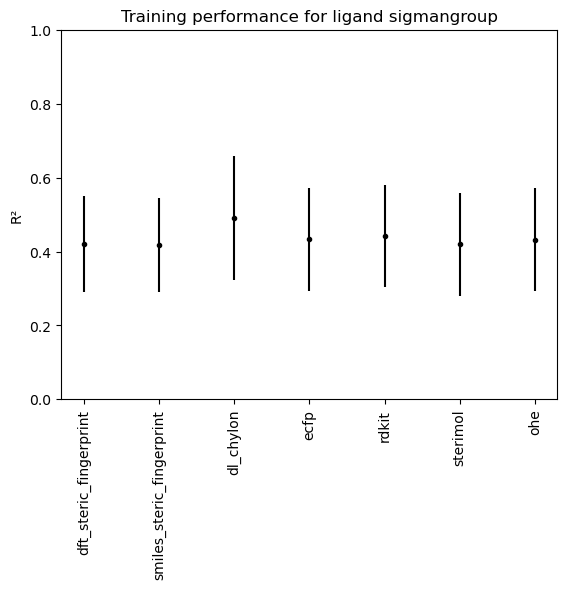

In [86]:
# plot test performance during training
for i, name in enumerate(AVAILABLE_LIGAND_REPRESENTATION_TYPES):
    fig, ax = plt.subplots()
    ax.set_title(f'Training performance for ligand {name}')
    ax.set_xticks(range(len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)))
    ax.set_xticklabels(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES, rotation=90)
    # set y range between 0 and 1
    ax.set_ylim([0, 1])
    ax.set_ylabel('R\u00B2')
    plt.errorbar(range(len(AVAILABLE_SUBSTRATE_REPRESENTATION_TYPES)), list_of_test_scores_mean[i], yerr=list_of_test_scores_std[i], fmt='.k')
    plt.show()

## Test effect of different combinations of training and test substrates

Training substrates: ['SM2', 'SM3']
Test substrates: ['SM1']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.76 +/- 0.05
Balanced accuracy on test substrate: 0.8791208791208791
----------------------------------------
Training substrates: ['SM1', 'SM3']
Test substrates: ['SM2']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.84 +/- 0.02
Balanced accuracy on test substrate: 0.8660287081339713
----------------------------------------
Training substrates: ['SM1', 'SM2']
Test substrates: ['SM3']
Training and testing classification
Test size: 0.2
Testing substrate representation: ['dft_steric_fingerprint']
Mean test performance during training: 0.83 +/- 0.03
Balanced accuracy on test substrate: 0.842134901764485
----------------------------------------


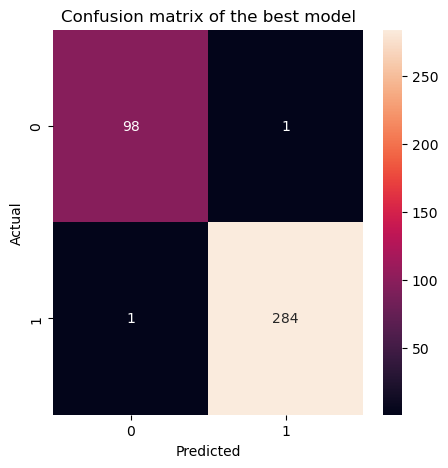

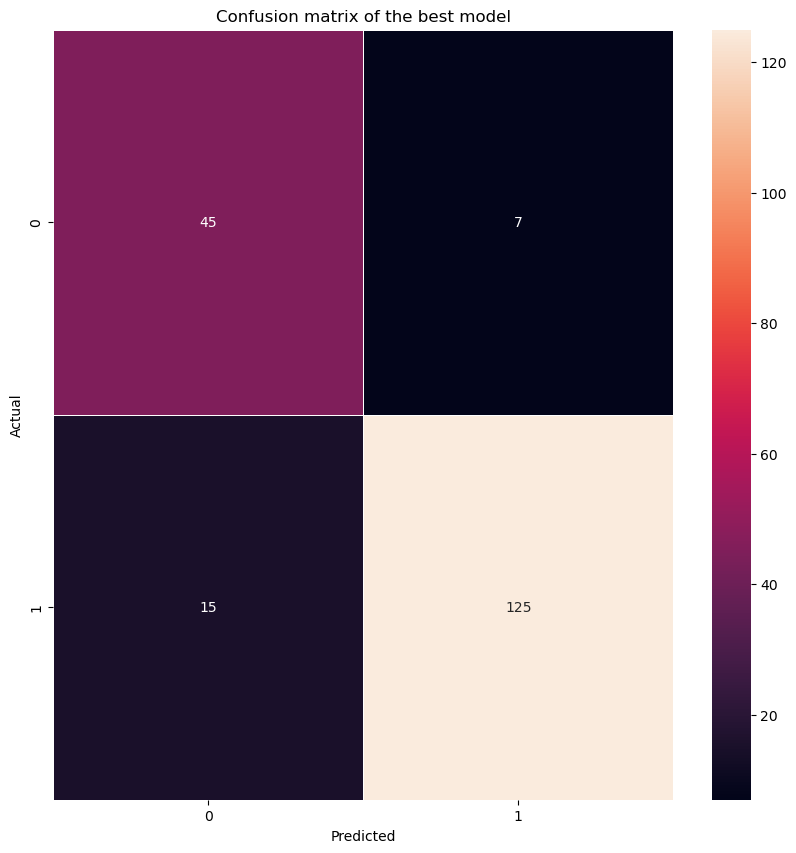

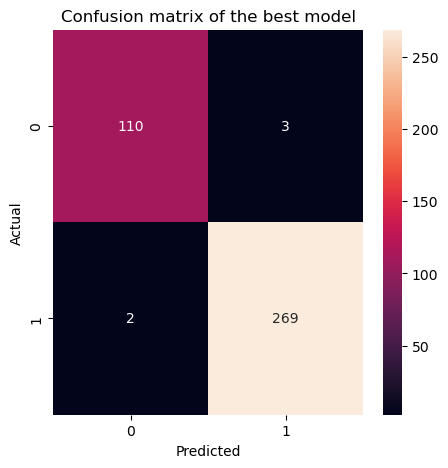

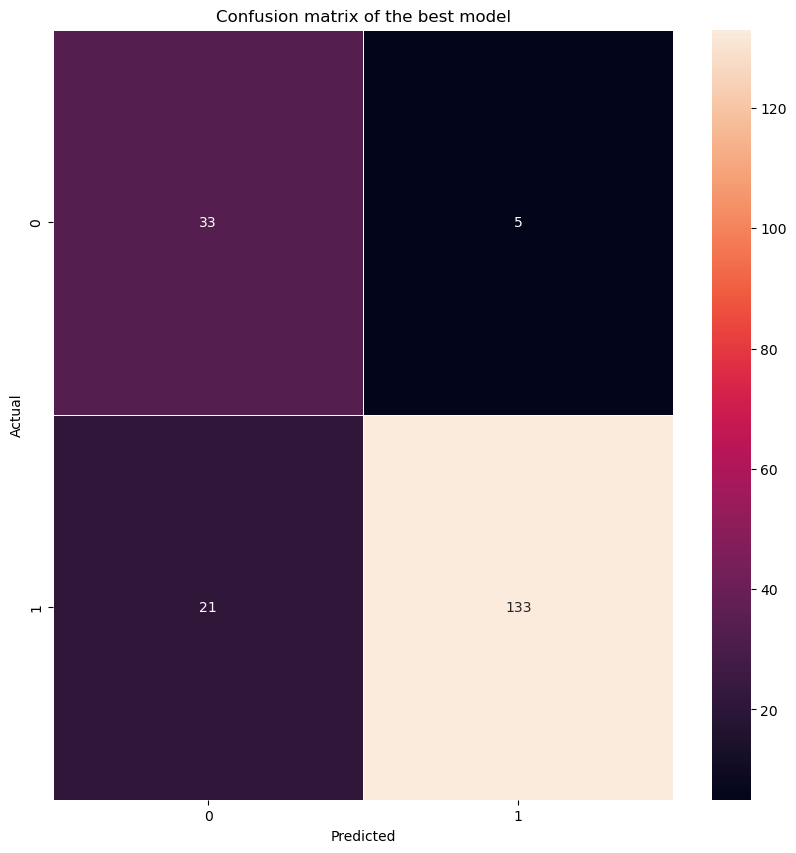

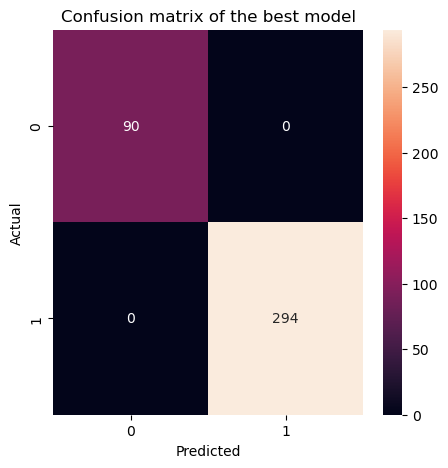

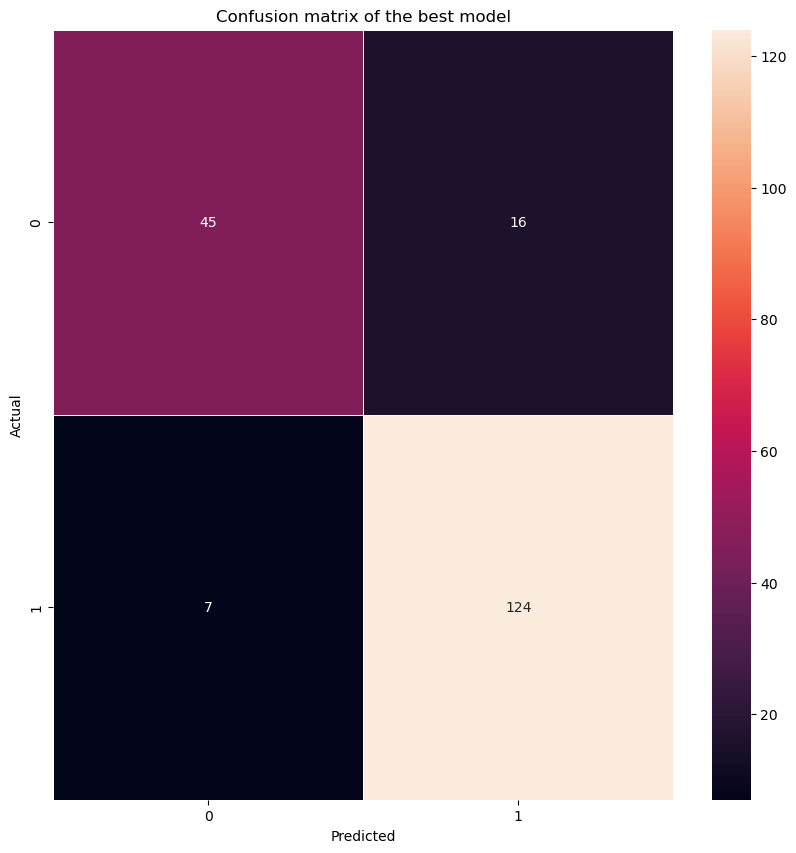

In [42]:
# choose 2 training substrates and 1 test substrate and try regression with loaded representations
list_of_substrates = ['SM1', 'SM2', 'SM3']
list_of_training_substrates = []
list_of_test_substrates = []

for test_substrate in list_of_substrates:
    list_of_training_substrates = [x for x in list_of_substrates if x != test_substrate]
    list_of_test_substrates = [test_substrate]
    print(f'Training substrates: {list_of_training_substrates}')
    print(f'Test substrates: {list_of_test_substrates}')
    selected_ligand_representations = ['dft_nbd_model']
    selected_substrate_representations = ['dft_steric_fingerprint']
    target = 'Conversion'
    target_threshold = 0.8
    rf_model = RandomForestClassifier(random_state=42)
    scoring = 'balanced_accuracy'
    train_splits = 5
    n_jobs = 4
    binary = True
    plot_dendrograms = False
    substrate_names_column = 'Substrate'
    ligand_numbers_column = 'Ligand#'
    print_ml_results = False

    print('Training and testing classification')
    print(f'Test size: {1/train_splits}')

    print(f'Testing substrate representation: {selected_substrate_representations}')
    best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(
        selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
        substrate_names_column, target, target_threshold, train_splits, binary=binary,
        list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
        rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs, plot_dendrograms=plot_dendrograms)
    print('Mean test performance during training: {:.2f} +/- {:.2f}'.format(training_test_scores_mean, training_test_scores_std))
    # print(f'Confusion matrix: {testing_cm_test}')
    print(f'Balanced accuracy on test substrate: {testing_balanced_accuracy_test}')
    # print(f'Feature importance: {fig_fi}')
    # print(f'Confusion matrix: {fig_cm}')
    print('----------------------------------------')
